In [ ]:
# !wget https://lab.stc.com.sa/dataset/assets/files/handests-open-dataset.zip
!wget https://upload.wikimedia.org/wikipedia/ar/4/47/Stc-logo.png
# !unzip -q handests-open-dataset.zip
!pip install squarify -q

--2022-12-04 21:03:48--  https://upload.wikimedia.org/wikipedia/ar/4/47/Stc-logo.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10952 (11K) [image/png]
Saving to: ‘Stc-logo.png’

Stc-logo.png        100%[===================>]  10.70K  --.-KB/s    in 0s      

2022-12-04 21:03:48 (176 MB/s) - ‘Stc-logo.png’ saved [10952/10952]



In [ ]:
STC_LOGO_PATH = "/content/Stc-logo.png"
STC_DS_PATH = "/content/Handests Open Dataset - Data CSV Extract.txt"
STC_DS_FIXED_PATH = "/content/drive/MyDrive/notebooks/Datasets/handsets_opendata_fixed.csv"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import datetime
import matplotlib.lines as lines
import matplotlib.image as Image
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
import squarify
import math
import scipy.stats as st
import statsmodels.stats.api as sm

In [ ]:
# with open(STC_DS_PATH) as file:
#     contents = file.read().replace("MiniX2-02, F1, C112, C6500,CORN MiniX2-02, F1, C112, C6500,CORN,CXTEL","MiniX2-02, CORN MiniX2-02, CORN, CXTEL")
#     contents = contents.replace("5217, 6700, C12, C3000,iNOVA 5217, 6700, C12, C3000,iNOVA,Ema Telecom", "5217, iNOVA 5217, iNOVA, Ema Telecom")
#     contents = contents.replace("Axon Mini Standard,Premium Edition,ZTE Axon Mini Standard,Premium Edition,ZTE,Google,Android,Smartphone", "Axon Mini Standard, ZTE Axon Mini Standard, ZTE, Google, Android, Smartphone")
#     contents = contents.replace("Mi5 Standard,Pro Edition,Xiaomi Mi5 Standard,Pro Edition,Xiaomi,Google,Android,Smartphone", "Mi5 Standard, Xiaomi Mi5 Standard, Xiaomi, Google, Android, Smartphone")
#     contents = contents.replace("Note Standard,Pro Edition,Innjoo Note Standard,Pro Edition,Innjoo,Google,Android,Smartphone", "Note Standard, Innjoo Note Standard, Innjoo, Google, Android, Smartphone")
#     contents = contents.replace("Droid Ultra,Droid Maxx,Droid Mini,Motorola Droid Ultra,Droid Maxx,Droid Mini,Motorola,Google,Android,Smartphone", "Droid Ultra, Motorola Droid Ultra, Motorola, Google, Android,Smartphone")
#     contents = contents.replace("i002, i003, i004, i005,VINKO i002, i003, i004, i005,VINKO,unknown,unknown,Smartphone", "i002, VINKO i002, VINKO, unknown, unknown, Smartphone")
#     contents = contents.replace("208,G3,225,220,M9i,Darago 208,G3,225,220,M9i,Darago,Google,Android,Smartphone", "208, Darago 208, Darago, Google, Android, Smartphone")
#     contents = contents.replace("HS-EG610,AD688G,C1000,Hisense HS-EG610,AD688G,C1000,Hisense,unknown,unknown,Smartphone", "HS-EG610, Hisense HS-EG610, Hisense,unknown,unknown,Smartphone")

# with open("handsets_opendata_fixed.csv", "w+") as file:
#     file.write(contents)

In [ ]:
df = pd.read_csv(STC_DS_FIXED_PATH, parse_dates=["CAL_DT"])
df.head()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019-01-31,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
1,2020-05-31,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,<18,NaN,NaN,Non-Saudi,1
2,2019-01-31,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,NaN,26-35,SAU,Saudi Arabia,Saudi,1
3,2019-12-31,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
4,2019-09-30,1202,Nokia 1202,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,N,N,N,NaN,36-55,BGD,Bangladesh,Non-Saudi,4


# Data Analysis

## Fix Structural Errors
Structural Errors in a dataset means the data either have typos or inconsistent spellings.

We'll inspect Every Column have a category type or similar to string nature.

In [ ]:
# Remove unwanted whitespaces from vendor names
df["VENDOR_NAME"] = df["VENDOR_NAME"].map(lambda x: x.strip())
",".join(list(df["VENDOR_NAME"].value_counts().index))

'Google,Nokia,Symbian LTD,Alcatel,RIM,Microsoft,Four,Tecno Technology,Symphony,LG,BlackBerry,ITEL,Philips,unknown,BOCOIN,Micromax,BLU,Darago,Wiko,Star,Lava,XTOUCH,Hope,ENERGIZER,IKU,QMobile,FERO,Kechao,Phone Care Branch of Axiom Telecom,Sony Ericsson,Gionee,Motorola,Sico,Archos,Changhong,Dinuotong Technology.,MOBO,HEDY,Digiphone,Magnus,QUISWISE,More International Group Limited,Rivo,CALME,Kingtech,Kenxinda,ZTS International,NSQ,Corn,Bird,Tichips,Ema Telecom,CXTEL,Innjoo,ZTE,KGTEL,Ctroniq,Bee,L8star,Topwell,B.easy,VGO TEL,CECT,Express Logic,CAT,Karbonn,Lephone,Citycall,GIVA,Eyang,Aliyun,Walton,Tinmo Technology,Gfive,i mobily,YAKOYA,Vell-Com,Windows Mobile,Condor,Lemon,K-Touch,TKK,Vodafone,Superinworld,CK Telecom,iYou,ZTC,Ying Tai,Doro AB,Aolixin Technology,Shenzhen Nony,Bontel,by2,GFEN,Vmaxx,YXTEL,Beafon,Anycool,CELLECOR,IPRO,BUNDY MOBILE,Anoking,OneClick,Noal Technology,Logic,AGM,Telego,Mobicel,moRebile,G-Tide,LEAGOO,EGLTEL,Evercoss,Positivo,Goldgoal International,G.M,GEEPEE,Siemens'

Fixing Some Incosistent names with spaces, due to the dataset a little bit uncleaned on csv format.

So After removing the additonal spaces. Now we need to Inspect manually If there's some misspelled names which gives a duplicate effect.

After Inspecting Everything seems fine, except for standardization sake we need to change "Dinuotong Technology." to "Dinuotong Technology" without the full stop at the end because ALL the name of vendors in this dataset doesn't have a fullstop at the end of the names. Except something like "B.easy" which is a dot at the middle of the name and that's a fair point because It's part of the company name.

In [ ]:
# Remove the dot at the end of company name
df["VENDOR_NAME"] = df["VENDOR_NAME"].str.replace("Dinuotong Technology.", "Dinuotong Technology")

<ipython-input-7-df6e860f1cd5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["VENDOR_NAME"] = df["VENDOR_NAME"].str.replace("Dinuotong Technology.", "Dinuotong Technology")


So After we knew there's a huge problem with duplicate values caused by whitespaces we'll build a pipeline for pandas to convert a bunch of columns, So by doing this we follow the protocol of DRY code.

In [ ]:
# Setting the columns to be cleaned from whitespaces
spaces_col_list = ["MODEL_NAME", "BRAND_FULL_NAME", "BRAND_NAME", "OS_NAME", "DEVICE_TYPE", "NATIONALITY_CD", "NATIONALITY_NAME", "AGE_B", "SAUDI_NON_SAUDI"]
# Create the Function to call upon .pipe pandas
def clean_whitespace(dataframe, affected_cols=None):
    """
    Function To Remove The Unwanted or Additional Whitespace From Feature values

    Args:
    dataframe: the whole dataframe from pandas (Pandas DataFrame)
    affected_cols: the specific columns you want to clean the whitespaces from. (list)

    Return:
    The whole dataframe cleaned. (DataFrame Object)
    """
    for col in affected_cols:
        dataframe[col] = dataframe[col].str.strip()
    print("Done Cleaning!")
    return dataframe

Create a Function to clean the pandas in one go!

By leveraging the power of pandas pipelines!

In [ ]:
# Call .pipe to call the pipeline we created
df.pipe(clean_whitespace, affected_cols=spaces_col_list)
df.head(3)

Done Cleaning!


,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019-01-31,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
1,2020-05-31,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,<18,NaN,NaN,Non-Saudi,1
2,2019-01-31,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,NaN,26-35,SAU,Saudi Arabia,Saudi,1


In [ ]:
# Inspect the BRAND_NAME
",".join(list(df["BRAND_NAME"].value_counts().index))

'Nokia,Lenovo,HTC,Xiaomi,Sony,LG,Alcatel,Oppo,Lava,Tecno,Motorola,Panasonic,Vivo,OnePlus,Four,Infinix,RIM,Itel,Symphony,ASUS,BlackBerry,Philips,Wiko,Microsoft,Mione,BOCOIN,Innjoo,Micromax,Darago,Gionee,BLU,Sony Ericsson,Google,QMobile,EUROSTAR & Device,Star,XTOUCH,Bee,Hope,Realme,ENERGIZER,IKU,FERO,Kechao,Sico,Kaliho,Bird,ZTE,G-Tide,OALE,HOTWAV,CAT,Archos,CORN,OUKITEL,Advan,Changhong,Gresso,Hisense,MOBO,HEDY,EXTREME,Obi,Digiphone,XDL,Gfive,Magnus,TP-LINK,QUISWISE,Rivo,Celkon,CALME,Kenxinda,au,OLA,Mobiistar,I-Life,UMI,G.M,NSQ,Cloudfone,Tichips,Longcheer,Honeywell,iNOVA,UMIDIGI,China Mobile,KGTEL,Ctroniq,L8star,VINKO,Tinmo,Topwell,B.easy,Lephone,Tenda,Karbonn,VGO TEL,CECT,Meizu,XLTEL,iBRIT,DOOGEE,Citycall,Letv,GIVA,Option,DADA,Eyang,BenQ,Glida,Walton,Cagabi,M-Horse,i mobily,YAKOYA,Vell-Com,Comio,Condor,RugGear,Zebra,Koobee,Gaoxinqi,Evercoss,MAXIMUS,Lemon,Vestel,zee,K-Touch,Airmax Mobile,TKK,Kata,Cubot,Vodafone,Vsun,Superinworld,Elephone,Mingren,CK Telecom,Vmaxx,Neffos,iYou,MBO,Reeder,Sug

After Inspecting the "BRAND_NAME" Column there's one brand I'm uncertain of which is: @phone. So I can't make the descion due to little information. For which brand could I classify it.

In [ ]:
# Fix IXPERIA Misspelled name for "BRAND_FULL_NAME" & "BRAND_NAME"
df["BRAND_FULL_NAME"] = df["BRAND_FULL_NAME"].str.replace("IXPERIA X8", "Sony Ericsson Xperia X8")
df["BRAND_FULL_NAME"] = df["BRAND_FULL_NAME"].str.replace("IXPERIA X1", "Sony Ericsson Xperia X1")
df["BRAND_NAME"] = df["BRAND_NAME"].str.replace("IXPERIA", "Sony Ericsson")

## Inspect Features and Values

Enough with fixing the Structural Errors. It's time to inspect more on our columns and which values stored in there. Which data types and get more in-depth description.

In [ ]:
# Get detailed information on the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150708 entries, 0 to 3150707
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CAL_DT            datetime64[ns]
 1   MODEL_NAME        object        
 2   BRAND_FULL_NAME   object        
 3   BRAND_NAME        object        
 4   VENDOR_NAME       object        
 5   OS_NAME           object        
 6   DEVICE_TYPE       object        
 7   _2G_FLG           object        
 8   _3G_FLG           object        
 9   _4G_FLG           object        
 10  WIFI_FLG          object        
 11  BLUETOOTH_FLG     object        
 12  TOUCH_SCREEN_FLG  object        
 13  DUAL_SIM_FLG      object        
 14  GENDER_TYPE_CD    object        
 15  AGE_B             object        
 16  NATIONALITY_CD    object        
 17  NATIONALITY_NAME  object        
 18  SAUDI_NON_SAUDI   object        
 19  DEVICE_COUNT      int64         
dtypes: datetime64[ns](1), int64(1), object(18)
mem

From this we can get information like:
- ALL columns are object type except "DEVICE_COUNT" & "CAL_DT"
- Obviously, When we work with BIG datasets like this one, The Null values can't be interpreted by pandas as shown above.
- Huge Memory usage 480 MB for a SINGLE DataFrame.

Firstly, Before Manipulating or visualizing or optimizing anything we need to check the Nulls If ANY.

In [ ]:
# Check Null values or NaNs
df.isnull().sum()

CAL_DT                   0
MODEL_NAME               0
BRAND_FULL_NAME          0
BRAND_NAME               0
VENDOR_NAME              0
OS_NAME                  0
DEVICE_TYPE              0
_2G_FLG                  0
_3G_FLG                  0
_4G_FLG                  0
WIFI_FLG                 0
BLUETOOTH_FLG            0
TOUCH_SCREEN_FLG         0
DUAL_SIM_FLG             0
GENDER_TYPE_CD      377660
AGE_B                    0
NATIONALITY_CD      319610
NATIONALITY_NAME    319605
SAUDI_NON_SAUDI          0
DEVICE_COUNT             0
dtype: int64

We can clearly see here:
- GENDER_TYPE_CD Column which have 377660 Null value
- NATIONALITY_CD Column which have 319610 Null value
- NATIONALITY_NAME Column which have 319605 Null value


Firstly, Let's Drop the Nulls from Gender Column,
Then we can fill the last 2 columns with "unknown" value.

In [ ]:
# Drop nulls from gender column
df.dropna(subset=["GENDER_TYPE_CD"], inplace=True)

In [ ]:
# Fill Nulls With "UNK" for Both Nationality abbr & "Unkown" for name
df["NATIONALITY_CD"].fillna("UNK", inplace=True)
df["NATIONALITY_NAME"].fillna("Unknown", inplace=True)

In [ ]:
# Check For Nulls just in case
df.isnull().sum()

CAL_DT              0
MODEL_NAME          0
BRAND_FULL_NAME     0
BRAND_NAME          0
VENDOR_NAME         0
OS_NAME             0
DEVICE_TYPE         0
_2G_FLG             0
_3G_FLG             0
_4G_FLG             0
WIFI_FLG            0
BLUETOOTH_FLG       0
TOUCH_SCREEN_FLG    0
DUAL_SIM_FLG        0
GENDER_TYPE_CD      0
AGE_B               0
NATIONALITY_CD      0
NATIONALITY_NAME    0
SAUDI_NON_SAUDI     0
DEVICE_COUNT        0
dtype: int64

### Check For Duplicates

In [ ]:
# Create mask for duplicates & Visualize
mask_duplicates = df.duplicated()
df[mask_duplicates]

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT


Nice! Our DataFrame doesn't have ANY duplicate values.

### Dive deep with each columns values

In [ ]:
# Inspect Age column values
df["AGE_B"].value_counts()

36-55    798858
26-35    620671
>55      533448
NA       405393
18-25    314710
<18       99968
Name: AGE_B, dtype: int64

Good to know there's a "NA" values for unidentifid age.

Keypoints:
- The Majority of people who used devices in the span of 2 years are between 36 - 55.
- The 2nd largest are people who aged between 26 - 35.
- The Smallest number goes to people who are bellow 18 years old. Which makes sense for these youths still some of them don't have the obligation to have a number and sign a contract works or bank accounts.
- Fairly, Large poration of ~400K people who uses these devices but their age are unidentified from the system.

In [ ]:
# Inspect the column which indicates Saudi & Non-Saudi
df["SAUDI_NON_SAUDI"].value_counts()

Non-Saudi    2504287
Saudi         268761
Name: SAUDI_NON_SAUDI, dtype: int64

Good, It's self explanatory here. Nothing to interpret .

Keypoints:
- Non-Saudi have the largest poration of uncommon handheld devices over the Saudis.

In [ ]:
# Inspect Nationalities name
df["NATIONALITY_NAME"].value_counts()

Unknown             251213
India               168497
Saudi Arabia        154051
Yemen               145228
Philippines         144465
                     ...  
Maldives                 6
El Salvador              6
Kuwait - without         5
San Marino               4
Cocos Islands            3
Name: NATIONALITY_NAME, Length: 209, dtype: int64

Great! here in nationality name we have each country name and islands. 

Keypoints:
- The Largest users from "unknown" value. I Kept it because in visualization later we need the other information from devices like: model name, brand name, OS name, etc....
- Second Largest portation of used uncommon handheld devices goes to Indians. 
- Interesting insight here, We have 2 values for Kuwait
    - 1. Kuwait 
    - 2. Kuwait - Without, Which means Bidoon.
    
    For more information: https://en.wikipedia.org/wiki/Bedoon


In [ ]:
# Inspect Nationality abbreviation column
df["NATIONALITY_CD"].value_counts()

UNK    251218
IND    168497
SAU    154051
YEM    145228
PHL    144465
        ...  
MDV         6
GTM         6
SLV         6
SMR         4
CCK         3
Name: NATIONALITY_CD, Length: 208, dtype: int64

Fantastic! Those values represents Nationality abbreviation. Instead of Full name like the previous one.

Keypoint:
- UNK which is a token we imputed in the last section Which represents the "unknown" Nationality. Also It's the largest Abbr. for nationality abbr. column. 
- India comes in 2nd place for most used uncommon handheld devices.
- SAU == Saudi comes in 3rd place for the most used of uncommon handheld devices.

In [ ]:
# Inspect gender column
df["GENDER_TYPE_CD"].value_counts()

Male      1888144
Female     884904
Name: GENDER_TYPE_CD, dtype: int64

We interpret from the result of gender column:
- Males have nearly 2 Million Number of uncommon handheld devices.
- Females have nearly 900K number of uncommon handheld devices.

In [ ]:
# Inspect DUAL_SIM_FLG column
df["DUAL_SIM_FLG"].value_counts()

Y    2032481
N     734756
Z       5811
Name: DUAL_SIM_FLG, dtype: int64

In [ ]:
# Inspect TOUCH_SCREEN_FLG column
df["TOUCH_SCREEN_FLG"].value_counts()

Y    1731796
N    1027924
Z      13328
Name: TOUCH_SCREEN_FLG, dtype: int64

In [ ]:
# Inspect BLUETOOTH_FLG column
df["BLUETOOTH_FLG"].value_counts()

Y    2506182
N     261990
Z       4876
Name: BLUETOOTH_FLG, dtype: int64

In [ ]:
# Inspect WIFI_FLG column
df["WIFI_FLG"].value_counts()

Y    1821771
N     917523
Z      33754
Name: WIFI_FLG, dtype: int64

In [ ]:
# Inspect _4G_FLG column
df["_4G_FLG"].value_counts()

N    1492788
Y    1280260
Name: _4G_FLG, dtype: int64

In [ ]:
# Inspect _3G_FLG column
df["_3G_FLG"].value_counts()

Y    1820858
N     952190
Name: _3G_FLG, dtype: int64

In [ ]:
# Inspect _2G_FLG column
df["_2G_FLG"].value_counts()

Y    2771562
N       1486
Name: _2G_FLG, dtype: int64

In [ ]:
mask1 = df["DUAL_SIM_FLG"] == "Z"
mask2 = df["VENDOR_NAME"] != "unknown"
mask3 = df["OS_NAME"] != "unknown"
df[mask1 & mask2 & mask3]

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
2078,2020-04-30,M5,Vell-Com M5,Vell-Com,Vell-Com,Proprietary,Mobile Phone,Y,N,N,Z,Z,N,Z,Male,>55,SAU,Saudi Arabia,Saudi,1
7270,2020-04-30,M5,Vell-Com M5,Vell-Com,Vell-Com,Proprietary,Mobile Phone,Y,N,N,Z,Z,N,Z,Female,26-35,PHL,Philippines,Non-Saudi,1
11308,2020-03-31,M1,CK Telecom M1,CK Telecom,CK Telecom,Proprietary,Mobile Phone,Y,N,N,Z,Z,N,Z,Male,26-35,UKR,Ukraine,Non-Saudi,1
14409,2020-04-30,M5,Vell-Com M5,Vell-Com,Vell-Com,Proprietary,Mobile Phone,Y,N,N,Z,Z,N,Z,Male,36-55,SAU,Saudi Arabia,Saudi,2
18303,2020-04-30,M5,Vell-Com M5,Vell-Com,Vell-Com,Proprietary,Mobile Phone,Y,N,N,Z,Z,N,Z,Male,36-55,SYR,Syria,Non-Saudi,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415059,2019-12-31,X2-02,moRebile X2-02,moRebile,moRebile,Proprietary,Mobile Phone,Y,N,N,Z,Z,Z,Z,Male,<18,SAU,Saudi Arabia,Saudi,1
2526150,2020-01-31,X2-02,moRebile X2-02,moRebile,moRebile,Proprietary,Mobile Phone,Y,N,N,Z,Z,Z,Z,Male,<18,SAU,Saudi Arabia,Saudi,1
2595810,2018-11-30,X2-02,moRebile X2-02,moRebile,moRebile,Proprietary,Mobile Phone,Y,N,N,Z,Z,Z,Z,Male,36-55,BGD,Bangladesh,Non-Saudi,1
2753524,2019-07-31,X2-02,moRebile X2-02,moRebile,moRebile,Proprietary,Mobile Phone,Y,N,N,Z,Z,Z,Z,Male,36-55,ALB,Albania,Non-Saudi,1


Interesting! So Just By Looking At FLAG Column values We can clearly see there's a weird value in their.

My Assumption For This:
- The People Who Worked On This Dataset, If We assumed the data comes from a DB So when they wanted to transform and format it to csv the flag values already have "Y" & "N" which we assumed it's y for yes, n for no. Then the question rises what about those null values ? And 100% they can't name it "N" for the sake of confusion the data scientist who will work on it. So we need to standardize they language they converting to the easiest way to place "Z" which indicates a NULL value. So now whether you import the data from javascript, Java, PHP, Python and so on you avoided the data types errors and in the same time you keep it as (FLAGS) as in the database was before!.

So To Fix this I'll drop this even if they hold information in other features but for 4 columns which indicates a strong value for this dataset I can't risk it with data visualization later and get all the results Noisy!.

In [ ]:
# Discard all Z values
df = df[df["TOUCH_SCREEN_FLG"] != "Z"]
df = df[df["BLUETOOTH_FLG"] != "Z"]
df = df[df["WIFI_FLG"] != "Z"]
df = df[df["DUAL_SIM_FLG"] != "Z"]

In [ ]:
# Inspect DEVICE_TYPE column values
df["DEVICE_TYPE"].value_counts()

Smartphone      1763649
Mobile Phone     964229
Name: DEVICE_TYPE, dtype: int64

Nice! We can see here the Smartphones have more users than the regular Mobile Phone. 

In [ ]:
# Inspect OS_NAME column values
df["OS_NAME"].value_counts()

Android           1587974
Proprietary        903966
Symbian             96784
Other               66495
RIM OS              30148
Windows Phone       25584
BlackBerry OS       14984
unknown              1587
Windows Mobile        356
Name: OS_NAME, dtype: int64

Awesome! Now I see there's a duplicate for category there. The "Other" & "unknown" OS names.

So to fix it we'll merge the unknown with Other the category.

In [ ]:
# Merge the unknown to other
df["OS_NAME"] = df["OS_NAME"].str.replace("unknown", "Other")

In [ ]:
# Inspect VENDOR_NAME column value
df["VENDOR_NAME"].value_counts()

Google                    1587974
Nokia                      644223
Symbian LTD                 84284
Alcatel                     55384
RIM                         30148
                           ...   
Positivo                        3
Goldgoal International          3
G.M                             3
GEEPEE                          2
Siemens                         2
Name: VENDOR_NAME, Length: 112, dtype: int64

In [ ]:
# Inspect BRAND_NAME column value
df["BRAND_NAME"].value_counts()

Nokia      835310
Lenovo     177121
HTC        162494
Sony       145652
Xiaomi     143548
            ...  
Hiro            3
Siemens         2
Gee Pee         2
I KALL          1
Malata          1
Name: BRAND_NAME, Length: 183, dtype: int64

In [ ]:
# Inspect BRAND_FULL_NAME column values 
df["BRAND_FULL_NAME"].value_counts()

Nokia 150 Dual SIM    14746
Nokia 105             14690
Nokia 105 (2015)      14393
Nokia 206             13890
Nokia 230 Dual SIM    13888
                      ...  
Siemens S4                2
Malata I10                1
ZTE V5                    1
Darago ONE                1
I KALL K9                 1
Name: BRAND_FULL_NAME, Length: 1165, dtype: int64

In [ ]:
# Inspect MODEL_NAME column values
df["MODEL_NAME"].value_counts()

206               15931
150 Dual SIM      14746
105               14690
105 (2015)        14393
1 Dual Sim        14173
                  ...  
P20                 113
R1S                  65
V869 and i9+++       57
x1                   27
I10                   1
Name: MODEL_NAME, Length: 929, dtype: int64

In [ ]:
# Inspect the top model "206" and which brands holds the same name of this model
df[df["MODEL_NAME"] == "206"]["BRAND_NAME"].value_counts()

Nokia     13890
BOCOIN     1030
Darago     1011
Name: BRAND_NAME, dtype: int64

In [ ]:
# Inspect CAL_DT column values
print(f"The Last Date: {df['CAL_DT'].max()}")
print(f"The First Date: {df['CAL_DT'].min()}") 

The Last Date: 2020-10-31 00:00:00
The First Date: 2018-11-30 00:00:00


Wow we have a bunch of insights here so lets take a look one by one.

VENDOR_NAME:
- We can see here The TOP of used devices belongs to Google then Nokia as vendors.
- Where in last place of least used device belongs to Siemens as vendors.

BRAND_NAME:
- Nokia gets first for brand of the most used uncommon handheld devices.
- Far Far away we get to 2nd place which belongs to lenovo.


BRAND_FULL_NAME:
- The Most used model of Nokia is "Nokia 150 Dual SIM" which hold the place for most used model by people.
- Then in 2nd place we got "Nokia 105" for 2nd most used model device from Nokia also. 
- Actually we got on we got the top all model of phones from Nokia!

MODEL_NAME:
- We see that the model "206" is the top but which brand holds the name of this model ? is it only Nokia ? or not. Let's see bellow the total number of this model and which brand name have this model:
    * Nokia     13890
    * BOCOIN     1030
    * Darago     1011
- We can see It's Not Only Nokia which had the model "206".

CAL_DT:
- The Calender Date column which indicates the time in date when people used these phones. So it's starting from 2018/11 and ends in 2020/10.

## Optimization of DataFrame
After the inspection process and data cleaning now we got a good grasp of the values and columns data types.

In [ ]:
# Create List for exceptions to NOT convert
exception_cols = ["CAL_DT", "MODEL_NAME", "BRAND_FULL_NAME", "DEVICE_COUNT"]

# Lopping through columns and change its type
for i in df.columns:
    if i not in exception_cols:
        # print(i)
        df[i] = df[i].astype("category")

# Inspect the memory and compare
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727878 entries, 0 to 3150707
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CAL_DT            datetime64[ns]
 1   MODEL_NAME        object        
 2   BRAND_FULL_NAME   object        
 3   BRAND_NAME        category      
 4   VENDOR_NAME       category      
 5   OS_NAME           category      
 6   DEVICE_TYPE       category      
 7   _2G_FLG           category      
 8   _3G_FLG           category      
 9   _4G_FLG           category      
 10  WIFI_FLG          category      
 11  BLUETOOTH_FLG     category      
 12  TOUCH_SCREEN_FLG  category      
 13  DUAL_SIM_FLG      category      
 14  GENDER_TYPE_CD    category      
 15  AGE_B             category      
 16  NATIONALITY_CD    category      
 17  NATIONALITY_NAME  category      
 18  SAUDI_NON_SAUDI   category      
 19  DEVICE_COUNT      int64         
dtypes: category(16), datetime64[ns](1), int64(1), 

Astonishing! From 480 MB to 153 MB WOW!

That's Like a decrease of ~327.3 MB

And In percentages it's like 68% decrease! 

So the key factor for this trick to change the data type to "category" and this data type have two rules: 
- The number of unique numbers much fewer than the whole column.
- The Series doesn't have Null values. (That's why we worked on it in later sections)

## Change DataFrame columns
We need to change some of the column names for convenience sake.



In [ ]:
df.columns

Index(['CAL_DT', 'MODEL_NAME', 'BRAND_FULL_NAME', 'BRAND_NAME', 'VENDOR_NAME',
       'OS_NAME', 'DEVICE_TYPE', '_2G_FLG', '_3G_FLG', '_4G_FLG', 'WIFI_FLG',
       'BLUETOOTH_FLG', 'TOUCH_SCREEN_FLG', 'DUAL_SIM_FLG', 'GENDER_TYPE_CD',
       'AGE_B', 'NATIONALITY_CD', 'NATIONALITY_NAME', 'SAUDI_NON_SAUDI',
       'DEVICE_COUNT'],
      dtype='object')

In [ ]:
# Change Column names
df.rename(columns={
    "_2G_FLG": "2G_FLAG",
    "_3G_FLG": "3G_FLAG",
    "_4G_FLG": "4G_FLAG",
    "WIFI_FLG": "WIFI_FLAG",
    "BLUETOOTH_FLG": "BLUETOOTH_FLAG",
    "TOUCH_SCREEN_FLG": "TOUCH_SCREEN_FLAG",
    "DUAL_SIM_FLG": "DUAL_SIM_FLAG",
    "GENDER_TYPE_CD": "GENDER_TYPE",
    "AGE_B": "AGE_RANGE",
    "NATIONALITY_CD": "NATIONALITY_ABBR"
}, inplace=True)

In [ ]:
df.columns

Index(['CAL_DT', 'MODEL_NAME', 'BRAND_FULL_NAME', 'BRAND_NAME', 'VENDOR_NAME',
       'OS_NAME', 'DEVICE_TYPE', '2G_FLAG', '3G_FLAG', '4G_FLAG', 'WIFI_FLAG',
       'BLUETOOTH_FLAG', 'TOUCH_SCREEN_FLAG', 'DUAL_SIM_FLAG', 'GENDER_TYPE',
       'AGE_RANGE', 'NATIONALITY_ABBR', 'NATIONALITY_NAME', 'SAUDI_NON_SAUDI',
       'DEVICE_COUNT'],
      dtype='object')

In [ ]:
df.head(2)

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,2G_FLAG,3G_FLAG,4G_FLAG,WIFI_FLAG,BLUETOOTH_FLAG,TOUCH_SCREEN_FLAG,DUAL_SIM_FLAG,GENDER_TYPE,AGE_RANGE,NATIONALITY_ABBR,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019-01-31,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
1,2020-05-31,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,<18,UNK,Unknown,Non-Saudi,1


### Data Attributes information
After inspecting all columns and getting the information needed I made this part came in later part of the analysis part not like the usual which is First step for most of the data science project that I saw. Because I feel more comfortable when writing those information after thorough analysis.



**Data Attributes Information:**

**Name — Data Type(Pandas) — Data Type(Statistic term) — Description**

CAL_DT — datetime object — Quantitative — Values 2018-11-30 / 2020-10-31 indicates people activity when using uncommon handheld devices.

MODEL_NAME — pandas object — Qualitative — The model name of the device.

BRAND_FULL_NAME — pandas object — Qualitative — The Brand name + model name of devices the people have.

BRAND_NAME — pandas category — Qualitative — The brand name like for example (E.g. Google, Nokia).

VENDOR_NAME — pandas category — Qualitative — The Vendor who distribute & make those handheld devices. Such as: Google, moRebile, etc..

OS_NAME — pandas category — Qualitative — The Operation System of the device the people have. Such as: Android.

DEVICE_TYPE — pandas category — Qualitative — The device type whether it's a Smartphone or Mobile Phone.

2G_FLAG — pandas category — Qualitative — A Flag to indicate whether the device support this feature or not. The Flag goes by "Y" for Yes, "N" for No.

3G_FLAG — pandas category — Qualitative — A Flag to indicate whether the device support this feature or not. The Flag goes by "Y" for Yes, "N" for No.

4G_FLAG — pandas category — Qualitative — A Flag to indicate whether the device support this feature or not. The Flag goes by "Y" for Yes, "N" for No.

WIFI_FLAG — pandas category — Qualitative — A Flag to indicate whether the device support this feature or not. The Flag goes by "Y" for Yes, "N" for No.

BLUETOOTH_FLAG — pandas category — Qualitative — A Flag to indicate whether the device support this feature or not. The Flag goes by "Y" for Yes, "N" for No.

TOUCH_SCREEN_FLAG — pandas category — Qualitative — A Flag to indicate whether the device support this feature or not. The Flag goes by "Y" for Yes, "N" for No.

DUAL_SIM_FLAG — pandas category — Qualitative — A Flag to indicate whether the device support this feature or not. The Flag goes by "Y" for Yes, "N" for No.

GENDER_TYPE — pandas category — Qualitative — The gender of the device holder whether it's a (Male or Female).

AGE_RANGE — pandas category — Quantitative — The Range of Ages of people.

NATIONALITY_ABBR — pandas category — Qualitative — The Nationality abbreviations of the users that have those uncommon handheld devices.

NATIONALITY_NAME — pandas category — Qualitative — The Nationality without abbreviation just the full name. Such as: Saudi Arabia, Sri Lanka.

SAUDI_NON_SAUDI — pandas category — Qualitative — The Flag to indicates the holder is it a Saudi ? or not.

DEVICE_COUNT — pandas integer64 — Quantitative — Total Number of Devices used in certain part of date the dataset have. Whether it's 2018, 2019, 2020.

# Statistical Analysis & Hypothesis Testing

In [ ]:
df.head(2)

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,2G_FLAG,3G_FLAG,4G_FLAG,WIFI_FLAG,BLUETOOTH_FLAG,TOUCH_SCREEN_FLAG,DUAL_SIM_FLAG,GENDER_TYPE,AGE_RANGE,NATIONALITY_ABBR,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019-01-31,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
1,2020-05-31,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,<18,UNK,Unknown,Non-Saudi,1


In [ ]:
# Mean of Device Count
df["DEVICE_COUNT"].mean()

32.05191361197238

In [ ]:
# Mean of the Device count from Males who are under the age of 18
df.loc[(df["AGE_RANGE"] == "<18") & (df["GENDER_TYPE"] == "Male")].DEVICE_COUNT.mean()

12.131046280819056

In [ ]:
# Mean of the Device count from Females who are under the age of 18
df.loc[(df["AGE_RANGE"] == "<18") & (df["GENDER_TYPE"] == "Female")].DEVICE_COUNT.mean()

3.517962854173257

In [ ]:
# Median of Device count
df["DEVICE_COUNT"].median()

2.0

Good to know! It seems there's an outlier values since the median and mean isn't that near each other.

Keypoints:
- The Age range of people bellow 18 have a higher number of people from males rather than the females.

## Standard Deviation
Measures the variation or dispersion of a set of values.

In simple words, High values mean higher variability.

Bigger than the mean(average) ==> Higher variation.


In [ ]:
# Check the Standard deviation
print(df["DEVICE_COUNT"].mean())
df["DEVICE_COUNT"].std()

32.05191361197238


442.1367197837028

We can see here that the values dispersed. Which means there's a divergence in number of people who have phones on their possession. Like someone have 3 phones, another have 8 and so on.

## T-test 
It helps us understand whether one group is "Statistically" different from the other.

Note: Common value for significance level is 5% or α=0.05. And I'll be using it through out this entire section.

Hypothesis
There are two types of hypothesis:

Null Hypothesis: Is a hypothesis which the researchers tries nullify or reject. OR in another definition, the two variables we use are "independent"
Alternative Hypothesis: Is a hypothesis the researchers tries to prove. OR in another definition, the two variables we use are "dependent"

======================

So We Wanna Test:

H0: The Number of holders of uncommon handheld devices are the same for Saudis & Non-Saudis

H1:The Number of holders of uncommon handheld devices are NOT the same for Saudis & Non-Saudis

In [ ]:
# Set the ALPHA value (p-value threshold)
ALPHA = 0.05

In [ ]:
# Subset: Number of Non-Saudis and Saudi Total Number of uncommon phones
saudi_total_devices = df.loc[df["SAUDI_NON_SAUDI"] == "Saudi"].DEVICE_COUNT
non_saudi_total_devices = df.loc[df["SAUDI_NON_SAUDI"] == "Non-Saudi"].DEVICE_COUNT

In [ ]:
# Check the Total Records for both sets
len(saudi_total_devices), len(non_saudi_total_devices)

(260375, 2467503)

In [ ]:
# Compute the T-test
stats, p = st.ttest_ind(a=saudi_total_devices.sample(frac=0.05), b=non_saudi_total_devices.sample(frac=0.05))
print(f"The p-value for T-test: {p}")

if p > ALPHA:
    print("BOTH The Number of holders of uncommon handheld devices are the same for Saudis & Non-Saudis (Failed to Reject H0)")
else:
    print("The Number of holders of uncommon handheld devices are NOT the same for Saudis & Non-Saudis (Reject H0)")

The p-value for T-test: 5.833901908413934e-160
The Number of holders of uncommon handheld devices are NOT the same for Saudis & Non-Saudis (Reject H0)


Great! They're not the same. As Shown above also for the number of records we could clearly see that Non-saudis have more uncommon handheld devices than the Saudis.

Let's test another Hypthesis:
- H0: Both The Total Holders of Uncommon Handheld devices From Males & Females are the same
- H1: The Total Holders of Uncommon Handheld devices From Males & Females are NOT the same

**NOTE:So we'll be testing this hypothesis regardless of the nationality.**

In [ ]:
# Prepare the two sets for male & female holders of uncommon handheld devices
male_total_devices = df.loc[df["GENDER_TYPE"] == "Male"].DEVICE_COUNT
female_total_devices = df.loc[df["GENDER_TYPE"] == "Female"].DEVICE_COUNT

In [ ]:
# Check the number of records for both sets
len(male_total_devices), len(female_total_devices)

(1854533, 873345)

In [ ]:
# Compute the T-test
stats, p = st.ttest_ind(a=male_total_devices.sample(frac=0.05), b=female_total_devices.sample(frac=0.05))
print(f"The p-value for T-test: {p}")

if p > ALPHA:
    print("Both The Total Holders of Uncommon Handheld devices From Males & Females are the same (Failed To Reject H0")
else:
    print("The Total Holders of Uncommon Handheld devices From Males & Females are NOT the same (Reject H0)")

The p-value for T-test: 1.1409559130754452e-39
The Total Holders of Uncommon Handheld devices From Males & Females are NOT the same (Reject H0)


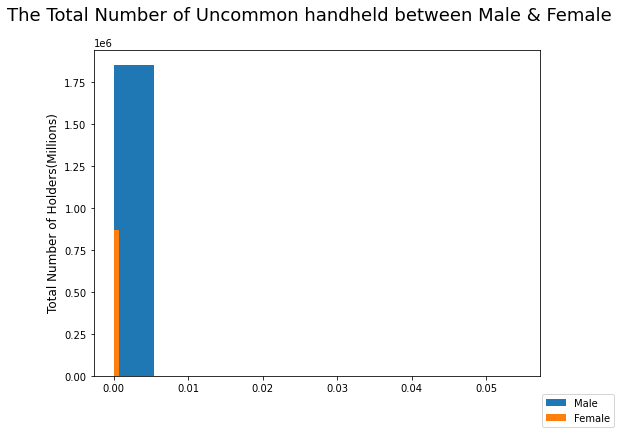

In [ ]:
# Visualize the total number between the Males & Females of have uncommon handheld devices
fig_t, ax_t = plt.subplots(figsize=(8, 6))

ax_t.hist(male_total_devices / 1_000_000, label="Male")
ax_t.hist(female_total_devices / 1_000_000, label="Female")

ax_t.set_ylabel("Total Number of Holders(Millions)", fontsize=12)

fig_t.suptitle("The Total Number of Uncommon handheld between Male & Female", fontsize=18)
fig_t.legend(loc="lower right")
plt.show()

## Chi-square test
Determine whether there's a statistically significant difference between the expected frequencies and the observed frequencies.

Lets test it out:
- H0: there's no relationship being Saudi or Non-Saudi with device type
- H1: there's a STRONG relationship being Saudi or Non-Saudi with device type

In [ ]:
df.head(2)

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,2G_FLAG,3G_FLAG,4G_FLAG,WIFI_FLAG,BLUETOOTH_FLAG,TOUCH_SCREEN_FLAG,DUAL_SIM_FLAG,GENDER_TYPE,AGE_RANGE,NATIONALITY_ABBR,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019-01-31,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
1,2020-05-31,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,<18,UNK,Unknown,Non-Saudi,1


In [ ]:
# Make crosstab for for Chi-square test
tab_saudi_nonsaudi = pd.crosstab(index=df["DEVICE_TYPE"],
                                 columns=df["SAUDI_NON_SAUDI"])
tab_saudi_nonsaudi

SAUDI_NON_SAUDI,Non-Saudi,Saudi
DEVICE_TYPE,,
Mobile Phone,879724,84505
Smartphone,1587779,175870


In [ ]:
# Compute Chi-square test
chi2, p, _, _ = st.chi2_contingency(tab_saudi_nonsaudi)
print(f"The p-value for the Chi-square test: {p}")

if p > ALPHA:
    print("there's no relationship being Saudi or Non-Saudi with device type (Failed to Reject H0)")
else:
    print("there's a STRONG relationship being Saudi or Non-Saudi with device type (Reject H0)")

The p-value for the Chi-square test: 4.431695898306203e-231
there's a STRONG relationship being Saudi or Non-Saudi with device type (Reject H0)


Great! It's showing that there's a realtionship being Saudi or Non-Saudi with the device type.

Let's Test Something With Age:
- H0: there's no relationship between Age and Device type used by people
- H1: there's a strong relationship between Age and Device type used by people

In [ ]:
# Create a crosstab for age & device type
tab_agedev = pd.crosstab(index=df["AGE_RANGE"].sample(frac=0.3),
                         columns=df["DEVICE_TYPE"].sample(frac=0.3))
tab_agedev

DEVICE_TYPE,Mobile Phone,Smartphone
AGE_RANGE,,
18-25,9164,18949
26-35,17689,37234
36-55,23554,47139
<18,3593,5385
>55,18643,28629
NA,13906,21861


In [ ]:
# Compute the Chi-square test
chi2, p, _, _ = st.chi2_contingency(tab_agedev)
print(f"The p-value for the Chi-square test: {p}")

if p > ALPHA:
    print("there's no relationship between Age and Device type used by people (Failed to Reject H0)")
else:
    print("there's a strong relationship between Age and Device type used by people (Reject H0)")

The p-value for the Chi-square test: 3.010259216390177e-232
there's a strong relationship between Age and Device type used by people (Reject H0)


Magnificent! It's showing there's a relationship between the device type and the age of people.

Lets Test out BRAND_NAME & SAUDI_NON_SAUDI:
- H0: There's no relationship between the brand names and being Saudi or Non-Saudi
- H1: There's a strong relationship between brand names and being Saudi or Non-Saudi

In [ ]:
# Create the crosstab for brand name & Saudi or not
tab_brands = pd.crosstab(index=df["BRAND_NAME"].sample(frac=0.15),
                         columns=df["SAUDI_NON_SAUDI"].sample(frac=0.15))
                         
tab_brands

SAUDI_NON_SAUDI,Non-Saudi,Saudi
BRAND_NAME,,
AGM,1,0
ASUS,464,62
Advan,56,11
Alcatel,2593,294
Anycool,0,1
...,...,...
iBRIT,12,2
iNEW,2,0
iNOVA,26,7


In [ ]:
# Compute Chi-square Test
chi2, p, _, _ = st.chi2_contingency(tab_brands)
print(f"The p-value for the Chi-square test: {p}")

if p > ALPHA:
    print("There's no relationship between brand names and being Saudi or Non-Saudi (Failed to Reject H0)")
else:
    print("There's a strong relationship between brand names and being Saudi or Non-Saudi (Reject H0)")

The p-value for the Chi-square test: 1.2159311744756328e-181
There's a strong relationship between brand names and being Saudi or Non-Saudi (Reject H0)


Wonderful! We can see the brand names do really effect if the person is Saudi or Not.

Let's test out if OS_NAME and SAUDI_NON_SAUDI have relationship or not:
- H0: There's no relationship between os system and the person being Saudi or not
- H1: There's a strong relationship between os system and the person being Saudi or not


In [ ]:
# Create a Crosstab for OS system & Saudi or not
tab_os = pd.crosstab(index=df["OS_NAME"].sample(frac=0.3),
                     columns=df["SAUDI_NON_SAUDI"].sample(frac=0.3))
tab_os

SAUDI_NON_SAUDI,Non-Saudi,Saudi
OS_NAME,,
Android,129552,13795
BlackBerry OS,1166,157
Other,5742,384
Proprietary,73942,7363
RIM OS,2395,326
Symbian,7713,1025
Windows Mobile,21,10
Windows Phone,2014,269


In [ ]:
# Compute Chi-square Test
chi2, p, _, _ = st.chi2_contingency(tab_os)
print(f"The p-value for the Chi-square test: {p}")

if p > ALPHA:
    print("There's no relationship between os system and the person being Saudi or not (Failed to Reject H0)")
else:
    print("There's a strong relationship between os system and the person being Saudi or not (Reject H0)")

The p-value for the Chi-square test: 3.8510501861068496e-41
There's a strong relationship between os system and the person being Saudi or not (Reject H0)


So by observing those tests there's a strong relationship between being saudi or not with the type of devices.


Let's test with gender & device support for dual SIM:
- H0: There's no relationship between gender & device support  for dual SIM
- H1: There's a strong relationship between gender & device support for dual SIM

In [ ]:
# Create a crosstab for gender & dual SIM
tab_dualsim_gender = pd.crosstab(index=df["GENDER_TYPE"],
                                 columns=df["DUAL_SIM_FLAG"])

tab_dualsim_gender

DUAL_SIM_FLAG,N,Y
GENDER_TYPE,,
Female,220035,653310
Male,480478,1374055


In [ ]:
# Compute Chi-square Test
chi2, p, _, _ = st.chi2_contingency(tab_dualsim_gender)
print(f"The p-value for the Chi-square test: {p}")

if p > ALPHA:
    print("There's no relationship between gender & device support for dual SIM (Failed to Reject H0)")
else:
    print("There's a strong relationship between gender & device support for dual SIM (Reject H0)")

The p-value for the Chi-square test: 2.4478719133779203e-36
There's a strong relationship between gender & device support for dual SIM (Reject H0)


Marvelous! There's a strong relationship between the two features the gender & Dual sim support.

So the People have a higher chance they're aiming for Dual Sim device if they want to buy a new one.

Lets Test Another thing which are Touch Screen Support & Saudi or non-Saudi do they have a relationship or not:
- H0: There's no relationship between touch screen support and person being Saudi or not
- H1: There's a strong relationship between touch screen support and person being Saudi or not

In [ ]:
# Create a crosstab for Saudi or not & touch screen support
tab_touchscreen = pd.crosstab(index=df["SAUDI_NON_SAUDI"],
                              columns=df["TOUCH_SCREEN_FLAG"])

tab_touchscreen

TOUCH_SCREEN_FLAG,N,Y
SAUDI_NON_SAUDI,,
Non-Saudi,910884,1556619
Saudi,88520,171855


In [ ]:
# Compute Chi-square Test
chi2, p, _, _ = st.chi2_contingency(tab_touchscreen)
print(f"The p-value for the Chi-square test: {p}")

if p > ALPHA:
    print("There's no relationship between touch screen support and person being Saudi or not (Failed to Reject H0)")
else:
    print("There's a strong relationship between touch screen support and person being Saudi or not (Reject H0)")

The p-value for the Chi-square test: 7.26760460147534e-190
There's a strong relationship between touch screen support and person being Saudi or not (Reject H0)


Well as shown above there IS a relationship between touch screen support and person being saudi or not.

# Data Visualization (Explatory Data Analysis)

Now After we done the data analysis part & statistical analysis. That's enough for now so lets start with "Data Visualization". And get some insights on the data we have visually.

**Disclaimer:** It will be "Fancy" plots and will be made with code 100% without any use of GUI or external tools that support automatic visualization.

## TOP-15 Brands Used by people

In [ ]:
top15_brands = (
    df
    .groupby(["BRAND_NAME"])
    .agg({"DEVICE_COUNT": "sum"})
    .sort_values("DEVICE_COUNT", ascending=False)
    .iloc[:15]
)
top15_brands

,DEVICE_COUNT
BRAND_NAME,
Nokia,65893565
Lenovo,2902074
HTC,2221714
Xiaomi,2130495
Alcatel,1973221
Sony,1603738
Oppo,1432642
LG,1380223
Lava,831215


In [ ]:
import matplotlib.patches as mpatches

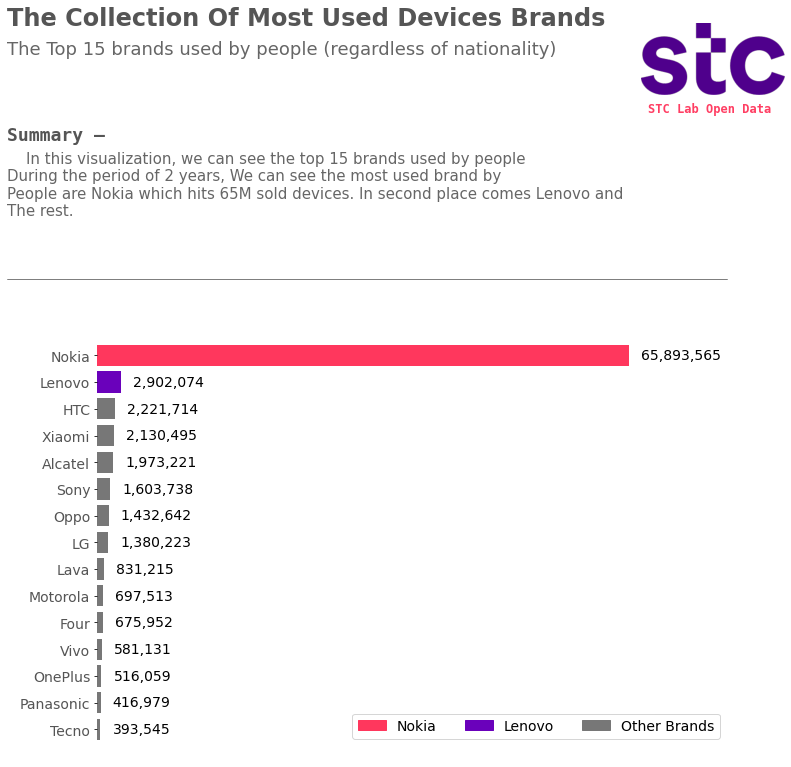

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#777",
          "#777",
          "#777",
          "#777",
          "#777",
          "#777",
          "#777",
          "#777",
          "#777",
          "#777","#777","#777","#777","#6A01BB","#FF375D"]


ax.barh(y=top15_brands.index[::-1],
        width=top15_brands["DEVICE_COUNT"][::-1],
        color=colors)

ax.set_yticklabels(labels=top15_brands.index[::-1], color="#555", fontsize=14)
ax.set_xticks([])

for index in top15_brands.index[::-1]:
    ax.annotate(s=f'{top15_brands["DEVICE_COUNT"][index]:,}',
                xy=(top15_brands["DEVICE_COUNT"][index] + 1_500_000, index),
                fontsize=14,
                va="center",
                # ha="center",
                fontweight="light",
                fontfamily="sans-serif",
                color="black"
                )

for pos in ["top", "bottom", "right", "left"]:
    ax.spines[pos].set_visible(False)

nokia = mpatches.Patch(color="#FF375D", label="Nokia")
lenovo = mpatches.Patch(color="#6A01BB", label="Lenovo")
others = mpatches.Patch(color="#777", label="Other Brands")


# Set Title, Summary, Logo, lines
fig.text(x=0,
         y=1.4,
         s="The Collection Of Most Used Devices Brands",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#555"
)
fig.text(x=0,
         y=1.35,
         s="The Top 15 brands used by people (regardless of nationality)",
         fontsize=18,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

fig.text(x=0,
         y=1.2,
         s="Summary —",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#555"
)

fig.text(x=0,
         y=1.04,
         s="""
    In this visualization, we can see the top 15 brands used by people 
During the period of 2 years, We can see the most used brand by 
People are Nokia which hits 65M sold devices. In second place comes Lenovo and
The rest.
         """,
         fontsize=15,
         fontweight="light",
         fontfamily="Sans-Serif",
         color="#666666"
)

fig.text(x=0.89,
         y=1.25,
         s="STC Lab Open Data",
         fontsize=12,
         fontweight="bold",
         fontfamily="monospace",
         color="#FF375D",
         alpha=0.96)

logo = Image.imread(STC_LOGO_PATH)
newax = fig.add_axes([0.88, 1.25, 0.2, 0.2], anchor=(0.5, 0.4), zorder=1)
newax.imshow(logo)
newax.axis(False)

l1 = lines.Line2D([0, 1], [0.96, 0.96], transform=fig.transFigure, figure=fig, color='black', lw=0.5)
fig.lines.extend([l1])


plt.legend(handles=[nokia, lenovo, others], ncol=3, fontsize=14, bbox_to_anchor=(0.6, -8.5))
plt.savefig("stc_top15_brands_devices", bbox_inches = 'tight')
plt.show()

## Preference of devices type between Saudi & Non-Saudi

In [ ]:
devtype_saudi_non_saudi = (
    df
    .groupby(["SAUDI_NON_SAUDI", "DEVICE_TYPE"])
    .agg({"DEVICE_TYPE": "count"})
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)

devtype_saudi_non_saudi

SAUDI_NON_SAUDI           Non-Saudi      Saudi
            DEVICE_TYPE                       
DEVICE_TYPE Smartphone    64.347602  67.544887
            Mobile Phone  35.652398  32.455113

<ipython-input-328-4aaf83d00681>:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[0].annotate("Smartphone",
<ipython-input-328-4aaf83d00681>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[0].annotate("Mobile Phone",
<ipython-input-328-4aaf83d00681>:79: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[1].annotate("Mobile Phone",
<ipython-input-328-4aaf83d00681>:97: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[1].annotate("Smartphone",


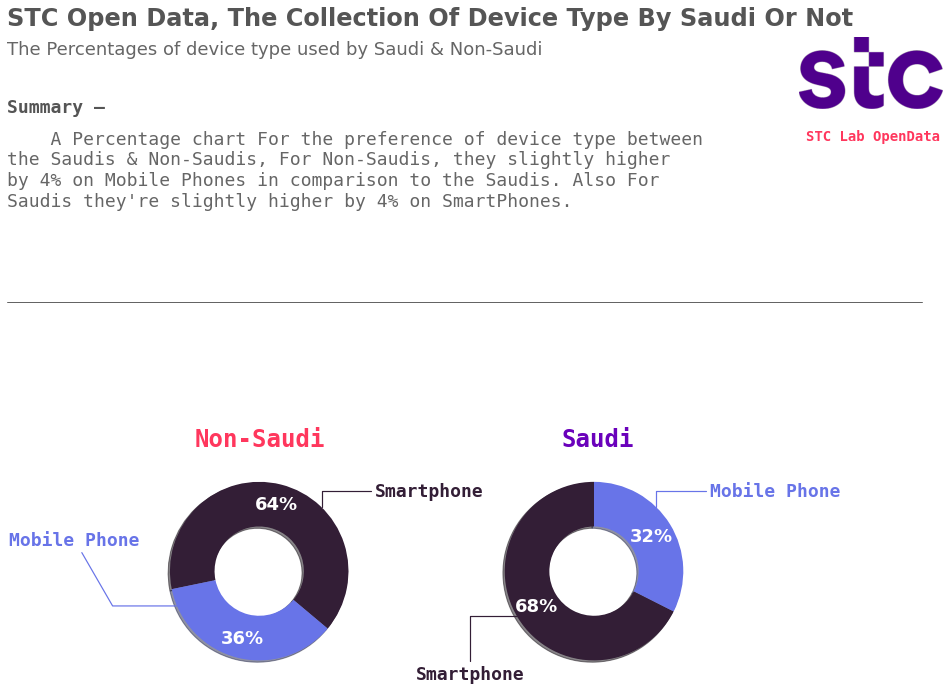

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), subplot_kw=dict(aspect="equal"))

circle = plt.Circle((0, 0), radius=0.44, color="white")

p = plt.gcf()
p.gca().add_artist(circle)

plt.subplots_adjust(wspace=0.5)

# iterate through labels
labels = []
for i in devtype_saudi_non_saudi.index:
    labels.append(i[1])

# Create the donut chart For Non-Saudi
ax[0].pie(x=devtype_saudi_non_saudi["Non-Saudi"].to_list(),
       labels=labels,
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":18, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=320,
       pctdistance=0.77,
)

# Create the donut chart For Saudi
ax[1].pie(x=devtype_saudi_non_saudi["Saudi"].to_list(),
       labels=labels,
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":18, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=90,
       pctdistance=0.75,
)


# Create the legend For Non-Saudi Chart
ax[0].annotate("Smartphone",
            xy=(0.7, 0.7),
            xycoords="data",
            xytext=(1.3, 0.9),
            textcoords='data',
            color="#331E36",
            fontsize=18,
            fontweight="bold",
            fontfamily="monospace",
            arrowprops=dict(facecolor="black",
                            # headwidth=6,
                            arrowstyle="-",
                            color="#331E36",
                            lw=1.2,
                            connectionstyle="angle, angleA=0, angleB=90"),
            verticalalignment="center"
)

ax[0].annotate("Mobile Phone",
            xy=(-0.7, -0.39),
            xycoords="data",
            xytext=(-2.8, 0.35),
            textcoords='data',
            color="#6874E8",
            fontsize=18,
            fontweight="bold",
            fontfamily="monospace",
            arrowprops=dict(facecolor="black",
                            arrowstyle="-",
                            color="#6874E8",
                            lw=1.2,
                            connectionstyle="angle, angleA=120, angleB=0"),
            verticalalignment="center"
)

# ===================================================================================

# Create the legend For Saudi Chart
ax[1].annotate("Mobile Phone",
            xy=(0.7, 0.7),
            xycoords="data",
            xytext=(1.3, 0.9),
            textcoords='data',
            color="#6874E8",
            fontsize=18,
            fontweight="bold",
            fontfamily="monospace",
            arrowprops=dict(facecolor="black",
                            # headwidth=6,
                            arrowstyle="-",
                            color="#6874E8",
                            lw=1.2,
                            connectionstyle="angle, angleA=0, angleB=90"),
            verticalalignment="center"
)

ax[1].annotate("Smartphone",
            xy=(-0.7, -0.5),
            xycoords="data",
            xytext=(-2., -1.15),
            textcoords='data',
            color="#331E36",
            fontsize=18,
            fontweight="bold",
            fontfamily="monospace",
            arrowprops=dict(facecolor="black",
                            arrowstyle="-",
                            color="#331E36",
                            lw=1.2,
                            connectionstyle="angle, angleA=90, angleB=0"),
            verticalalignment="center"
)

# ============================= Set Title, Suptitle, legend title, Summary, Logo, Source =============================

# Set legend title #FF375D برتقالي
# Non Saudi
fig.text(x=0.19,
         y=0.72,
         s="Non-Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="monospace",
         color="#FF375D"
)

# Set legend title # 6A01BB بنفسجي
# Saudi
fig.text(x=0.7,
         y=0.72,
         s="Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="monospace",
         color="#6A01BB"
)

# Set title
fig.text(x=-0.07,
         y=1.45,
         s="STC Open Data, The Collection Of Device Type By Saudi Or Not",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#555"
)

# Set Suptitle
fig.text(x=-0.07,
         y=1.4,
         s="The Percentages of device type used by Saudi & Non-Saudi",
         fontsize=18,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

# Set Summary Header
fig.text(x=-0.07,
         y=1.3,
         s="Summary —",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#555"
)

# Set Summary Text
fig.text(x=-0.07,
         y=1.1,
         s="""
    A Percentage chart For the preference of device type between
the Saudis & Non-Saudis, For Non-Saudis, they slightly higher
by 4% on Mobile Phones in comparison to the Saudis. Also For 
Saudis they're slightly higher by 4% on SmartPhones.
         """,
         fontsize=18,
         fontweight="light",
         fontfamily="monospace",
         color="#666"
)

# Set logo
stc_logo = Image.imread(STC_LOGO_PATH)
newax_logo = fig.add_axes([1.03, 1.23, 0.20, 0.20], anchor="NE", zorder=1337)
newax_logo.imshow(stc_logo)
newax_logo.axis(False)

# Set Source
fig.text(x=1.04,
         y=1.25,
         s="STC Lab OpenData",
         fontweight="bold",
         fontsize=14,
         fontfamily="monospace",
         color="#FF375D"
)

# Set line between sections
l2 = lines.Line2D(xdata=[-0.07, 1.2], ydata=[0.97, 0.97], transform=fig.transFigure, figure=fig, color="black", lw=0.6)
fig.lines.extend([l2])


plt.savefig("stc_pie_device_preference", bbox_inches = 'tight')
plt.show()

## The Age range of Saudi & Non-Saudi who uses those devices

In [ ]:
agerange_saudi_non_saudi = (
    df
    .groupby(["SAUDI_NON_SAUDI", "AGE_RANGE"])
    .agg({"AGE_RANGE": "count"})
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)

agerange_saudi_non_saudi

SAUDI_NON_SAUDI      Non-Saudi  Saudi
          AGE_RANGE                  
AGE_RANGE 36-55         730196  54533
          26-35         561882  49252
          >55           478304  45707
          NA            356307  41790
          18-25         270138  41064
          <18            70676  28029

In [ ]:
# Extract the index labels
labels = []
for i in agerange_saudi_non_saudi.index:
    labels.append(i[1])
labels

['36-55', '26-35', '>55', 'NA', '18-25', '<18']

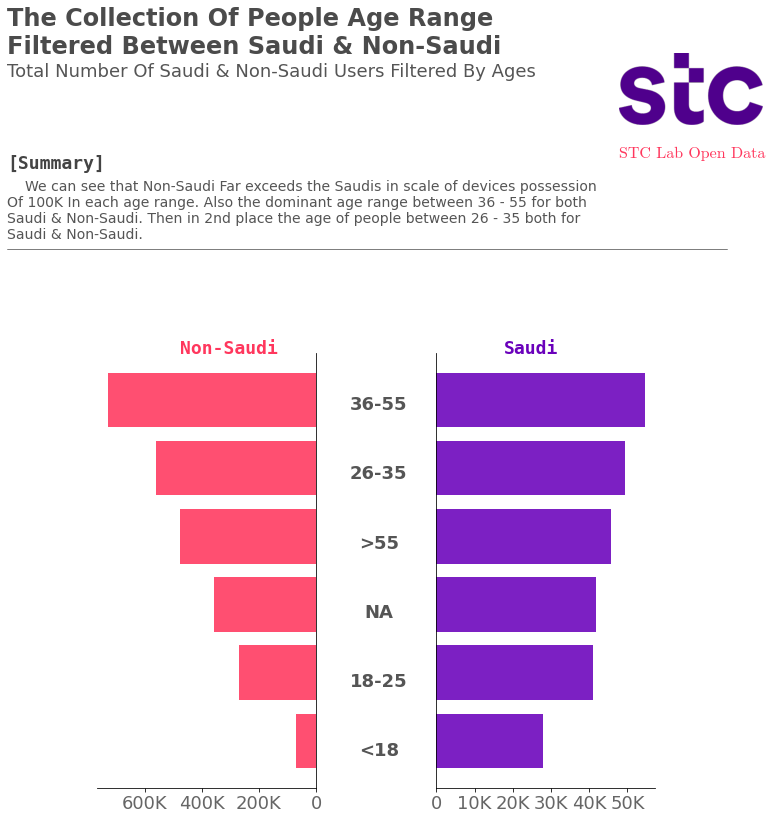

In [ ]:
fig, (ax_left, ax_right) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Set the bar on the left (Non-Saudi)
ax_left.barh(y=labels[::-1],
             width=agerange_saudi_non_saudi["Non-Saudi"][::-1],
             color="#FF375D", alpha=0.88)

ax_left.set_yticks([])
ax_left.invert_xaxis()

# Set Xticks & labels
ax_left.set_xticklabels(["0", "200K", "400K", "600K", "800K"], fontsize=18, color="#666")


# Set the bar on the right (Saudi)
ax_right.barh(y=labels[::-1],
              width=agerange_saudi_non_saudi["Saudi"][::-1],
              color="#6A01BB", alpha=0.88)

# Hide the Y ticks
ax_right.set_yticks([])

# Set Xticks & Labels
ax_right.set_xticklabels(["0", "10K", "20K", "30K", "40K", "50K", "60K", "70K", "80K"], fontsize=18, color="#666")

# Adjust the subplots spaces in-between
plt.subplots_adjust(wspace=0.55)

thresh = 0.21

# Create the x-axis for both
for col in labels:
    fig.text(x=0.516,
             y=1 - thresh,
             s=str(col),
             fontsize=18,
             va="center",
             ha="center",
             fontweight="bold",
             fontfamily="sans-serif",
             color="#555")
    thresh = thresh + 0.12

# Annotate the percentages for left & Right axes
# for i, col in enumerate(labels):
#     ax_right.annotate(s=f'{agerange_saudi_non_saudi["Saudi"][i]:,}',
#                      xy=(agerange_saudi_non_saudi["Saudi"][i], col),
#                      va="center",
#                      ha="center",
#                      fontsize=20,
#                      fontweight="light",
#                      fontfamily="sans-serif",
#                      color="black")
    
# # Annotate the left axis
# for i, col in enumerate(labels):
#     ax_left.annotate(s=f'{agerange_saudi_non_saudi["Non-Saudi"][i]:,}',
#                      xy=(agerange_saudi_non_saudi["Non-Saudi"][i], col),
#                      va="center",
#                      ha="center",
#                      fontsize=20,
#                      fontweight="light",
#                      fontfamily="sans-serif",
#                      color="black")


# Remove the borders on left chart
ax_left.spines["top"].set_visible(False)
ax_left.spines["left"].set_visible(False)
# ax_left.spines["right"].set_visible(False)

# Remove the borders on right chart
ax_right.spines["top"].set_visible(False)
ax_right.spines["right"].set_visible(False)
# ax_right.spines["left"].set_visible(False)

# =================== Start of Creating Title, Custom Legend, Summary, 2nd title, logo =====================

# Custom Legend (Non-Saudi)
fig.text(x=0.24,
         y=0.88,
         s="Non-Saudi",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#FF375D")

# Custom Legend (Saudi)
fig.text(x=0.69,
         y=0.88,
         s="Saudi",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#6A01BB")

# Create a Title
fig.text(x=0,
         y=1.4,
         s="""The Collection Of People Age Range 
Filtered Between Saudi & Non-Saudi""",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#444444",
         alpha=0.96)

# Create a suptitle
fig.text(x=0,
         y=1.36,
         s="Total Number Of Saudi & Non-Saudi Users Filtered By Ages",
         fontsize=18,
         fontweight="light",
         fontfamily="sans-serif",
         color="#555555")

# Create a summary
fig.text(x=0,
         y=1.2,
         s="[Summary]",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#444444"
)

# Create a summary text
fig.text(x=0,
         y=1.05,
         s="""
    We can see that Non-Saudi Far exceeds the Saudis in scale of devices possession
Of 100K In each age range. Also the dominant age range between 36 - 55 for both
Saudi & Non-Saudi. Then in 2nd place the age of people between 26 - 35 both for
Saudi & Non-Saudi.
         """,
         fontsize=14,
         fontweight="light",
         fontfamily="sans-serif",
         color="#555555")

# Create a source mark
fig.text(x=0.85,
         y=1.22,
         s="STC Lab Open Data",
         fontsize=16,
         fontweight="light",
         fontfamily="cmr10",
         color="#FF375D")

# Create the logo
logo_stc = Image.imread(STC_LOGO_PATH)
newax = fig.add_axes([0.85, 1.2, 0.20, 0.20], anchor="NE", zorder=1337)
newax.imshow(logo_stc)
newax.axis(False)

# Create a Line to seprate the summary and chart
l1 = lines.Line2D(xdata=[0, 1], ydata=[1.06, 1.06], transform=fig.transFigure, figure=fig, color="black", lw=0.5)
fig.lines.extend([l1])

plt.savefig("stc_age_range_saudi_nonsaudi", bbox_inches = 'tight')
plt.show()

## Total Device Number in posession between Saudi & Non-Saudi During the period of 2 years

In [ ]:
# Create a DataFrame of total device to plot
total_device_2years = (
    df
    .groupby(["CAL_DT", "SAUDI_NON_SAUDI"], as_index=False)
    .agg({"DEVICE_COUNT": "count"})
    .pivot_table(
        index="CAL_DT",
        columns="SAUDI_NON_SAUDI",
        values="DEVICE_COUNT"
    )
)
total_device_2years.index = total_device_2years.index.strftime("%y-%b")
total_device_2years

SAUDI_NON_SAUDI,Non-Saudi,Saudi
CAL_DT,,
18-Nov,95122,12333
18-Dec,98459,10007
19-Jan,98515,12492
19-Feb,100392,12531
19-Mar,101671,12597
19-Apr,103071,12676
19-May,103851,12683
19-Jun,104602,12696
19-Jul,106782,10204


In [ ]:
lines_dates = total_device_2years.index.astype(str)
lines_dates

Index(['18-Nov', '18-Dec', '19-Jan', '19-Feb', '19-Mar', '19-Apr', '19-May',
       '19-Jun', '19-Jul', '19-Aug', '19-Sep', '19-Oct', '19-Nov', '19-Dec',
       '20-Jan', '20-Feb', '20-Mar', '20-Apr', '20-May', '20-Jun', '20-Jul',
       '20-Aug', '20-Sep', '20-Oct'],
      dtype='object', name='CAL_DT')

In [ ]:
# Create a DF to check ratio
yearly_device_ratio = (
    df
    .groupby(["CAL_DT", "SAUDI_NON_SAUDI"], as_index=False)
    .agg({"DEVICE_COUNT": "count"})
    .pivot_table(
        index="CAL_DT",
        columns="SAUDI_NON_SAUDI",
        values="DEVICE_COUNT"
    )
    .resample("Y")
    .sum()
)
yearly_device_ratio["Total"] = yearly_device_ratio["Non-Saudi"] + yearly_device_ratio["Saudi"]
yearly_device_ratio.index = yearly_device_ratio.index.strftime("%Y")
yearly_device_ratio

SAUDI_NON_SAUDI,Non-Saudi,Saudi,Total
CAL_DT,,,
2018,193581,22340,215921
2019,1255641,137117,1392758
2020,1018281,100918,1119199


In [ ]:
# Create the ratio vars
saudi_2020_ratio = round((yearly_device_ratio["Saudi"]["2020"] * 100) / (yearly_device_ratio["Total"]["2020"]))
nonsaudi_2020_ratio = round((yearly_device_ratio["Non-Saudi"]["2020"] * 100) / (yearly_device_ratio["Total"]["2020"]))
saudi_2020_ratio, nonsaudi_2020_ratio

(9, 91)

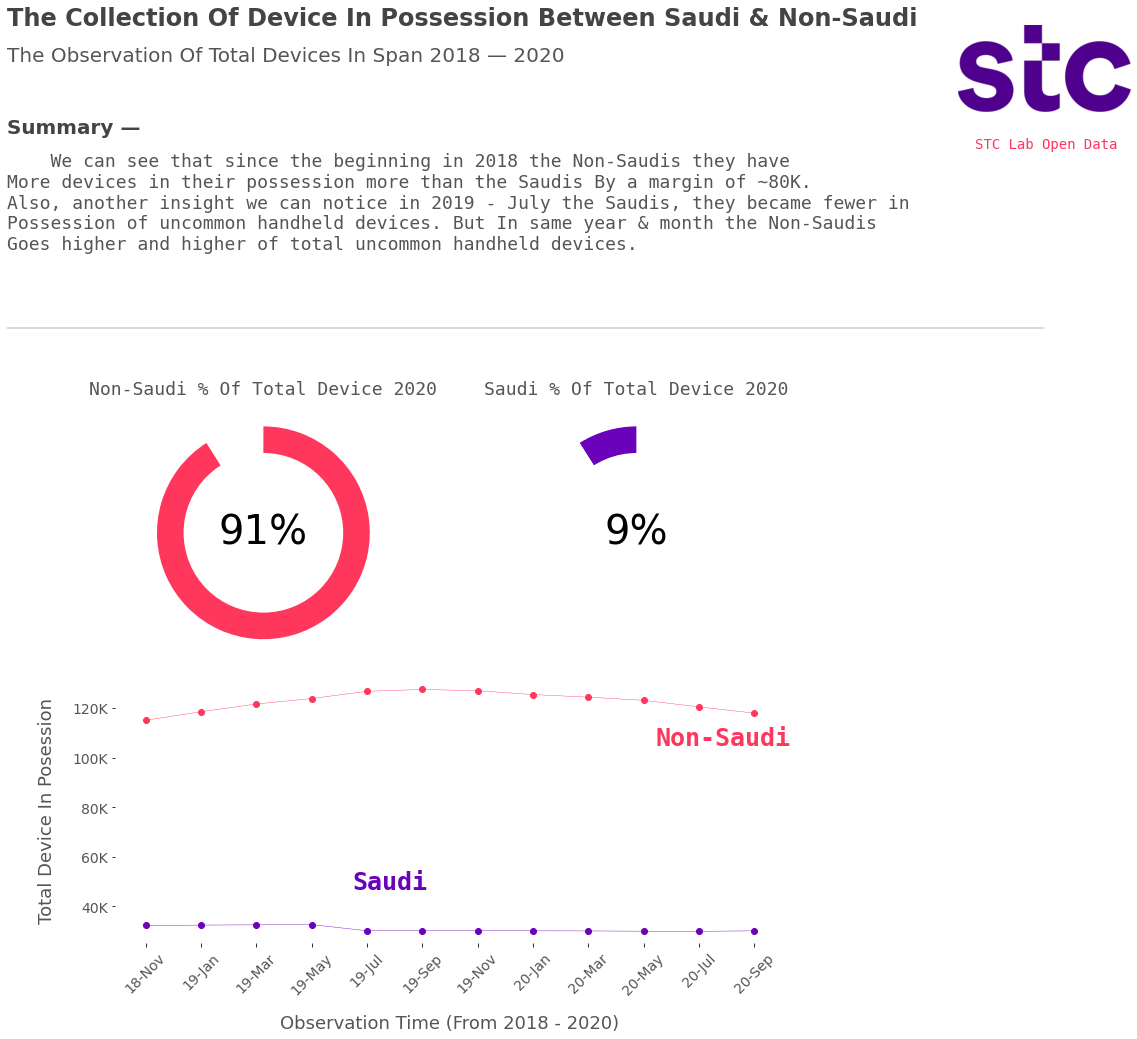

In [ ]:
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(nrows=8, ncols=4)
ax1 = fig.add_subplot(gs[0:4, 0:2]) # First KPI
ax2 = fig.add_subplot(gs[0:4, 2:]) # Second KPI
ax3 = fig.add_subplot(gs[4:, 0:]) # Main Chart


ax3.plot(lines_dates[::2], total_device_2years["Saudi"][::2], label="Saudi", color="#6A01BB", marker="o", lw=0.4)
ax3.plot(lines_dates[::2], total_device_2years["Non-Saudi"][::2], label="Non-Saudi", color="#FF375D", marker="o", lw=0.4) 


ax3.set_ylabel("Total Device In Posession", fontsize=18, labelpad=17, color="#555")
ax3.set_xlabel("Observation Time (From 2018 - 2020)", fontsize=18, labelpad=17, color="#555")
ax3.set_yticklabels(labels=["20K", "40K", "60K", "80K", "100K", "120K", "140K"], fontsize=14, color="#555")
ax3.set_xticklabels(labels=total_device_2years.index[::2], fontsize=14, color="#555")

plt.xticks(rotation=45);

# Start First KPI (Non-Saudi) 

# Turn Off Axis Ticks
ax1.set_xticks([])
ax1.set_yticks([])

# Plot KPI Card
ax1.pie(x=[saudi_2020_ratio, nonsaudi_2020_ratio],
        colors=["#FFF", "#FF375D"],
        startangle=90,
        labels=["", ""]
)

hole = plt.Circle((0, 0), 0.75, fc="white")

# Add White Circle to Pie Chart
ax1.add_patch(hole)

# Add Text
ax1.text(x=0,
         y=0,
         s=str(nonsaudi_2020_ratio) + "%",
         ha="center",
         va="center",
         fontsize=40
)

ax1.set_title(label="Non-Saudi % Of Total Device 2020",
              fontsize=18,
              fontweight="light",
              fontfamily="monospace",
              color="#555"
)

# Start Second KPI (Saudi)

# Turn Off Axis Ticks
ax2.set_xticks([])
ax2.set_yticks([])


# Plot KPI Card
ax2.pie(x=[saudi_2020_ratio, nonsaudi_2020_ratio],
        colors=["#6A01BB", "#FFF"],
        startangle=90,
        labels=["", ""]
)

# Create A Hole for KPI 2nd
hole2 = plt.Circle((0, 0), 0.75, fc="white")

# Add White Circle to Pie Chart
ax2.add_patch(hole2)

# Add Text
ax2.text(x=0,
         y=0,
         s=str(saudi_2020_ratio) + "%",
         ha="center",
         va="center",
         fontsize=40
)

ax2.set_title(label="Saudi % Of Total Device 2020",
              fontsize=18,
              fontweight="light",
              fontfamily="monospace",
              color="#555"
)


for pos in ["top", "bottom", "right", "left"]:
    ax3.spines[pos].set_visible(False)
    ax2.spines[pos].set_visible(False)
    ax1.spines[pos].set_visible(False)


# ====================== Set Title, Suptitle, Legend, Summary, Logo ===============================

fig.text(x=0.4, 
         y=0.2,
         s="Saudi",
         fontsize=25,
         fontfamily="monospace",
         fontweight="bold",
         color="#6A01BB"
)

fig.text(x=0.75, 
         y=0.4,
         s="Non-Saudi",
         fontsize=25,
         fontfamily="monospace",
         fontweight="bold",
         color="#FF375D"
)

fig.text(x=0,
         y=1.4,
         s="The Collection Of Device In Possession Between Saudi & Non-Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#444"
)

fig.text(x=0,
         y=1.35,
         s="The Observation Of Total Devices In Span 2018 — 2020",
         fontsize=20,
         fontweight="light",
         fontfamily="sans-serif",
         color="#555"
)

fig.text(x=0,
         y=1.25,
         s="Summary —",
         fontsize=20,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#444"
)

fig.text(x=0,
         y=1.06,
         s="""
    We can see that since the beginning in 2018 the Non-Saudis they have
More devices in their possession more than the Saudis By a margin of ~80K.
Also, another insight we can notice in 2019 - July the Saudis, they became fewer in
Possession of uncommon handheld devices. But In same year & month the Non-Saudis
Goes higher and higher of total uncommon handheld devices.
         """,
         fontsize=18,
         fontweight="light",
         fontfamily="monospace",
         color="#555"
)

fig.text(x=1.12,
         y=1.23,
         s="STC Lab Open Data",
         fontsize=14,
         fontweight="light",
         fontfamily="monospace",
         color="#FF375D")

l2 = lines.Line2D(xdata=[0, 1.2], ydata=[0.98, 0.98], transform=fig.transFigure, figure=fig, color="black", lw=0.3)
fig.lines.extend([l2])

stc_logo = Image.imread(STC_LOGO_PATH)
newax_logo = fig.add_axes([1.1, 1.2, 0.20, 0.20], anchor="NE", zorder=1337) 
newax_logo.imshow(stc_logo)
newax_logo.axis(False)

plt.subplots_adjust(wspace=0.7)

plt.savefig("stc_linechart_devicetotal", bbox_inches = 'tight')
plt.show()

## The preference in deivces in the support of 2G, 3G, 4G, WIFI, BLUETOOTH, TOUCHSCREEN, DUAL SIM.

### The Comparison between 2G, 3G, 4G.

In [ ]:
flags = []
flags.append("SAUDI_NON_SAUDI")
for i in df.columns[7:14]:
    flags.append(i)

In [ ]:
# Create a 2G DataFrame
support_2g = (
    df
    .groupby(["SAUDI_NON_SAUDI", "2G_FLAG"])
    .agg({"2G_FLAG": "count"})
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)

# Create a 3G dataframe
support_3g = (
    df
    .groupby(["SAUDI_NON_SAUDI", "3G_FLAG"])
    .agg({"3G_FLAG": "count"})
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)

# # Create a 4G dataframe
support_4g = (
    df
    .groupby(["SAUDI_NON_SAUDI", "4G_FLAG"])
    .agg({"4G_FLAG": "count"})
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=True)
)
support_4g

SAUDI_NON_SAUDI  Non-Saudi     Saudi
        4G_FLAG                     
4G_FLAG Y        46.998687  45.13759
        N        53.001313  54.86241

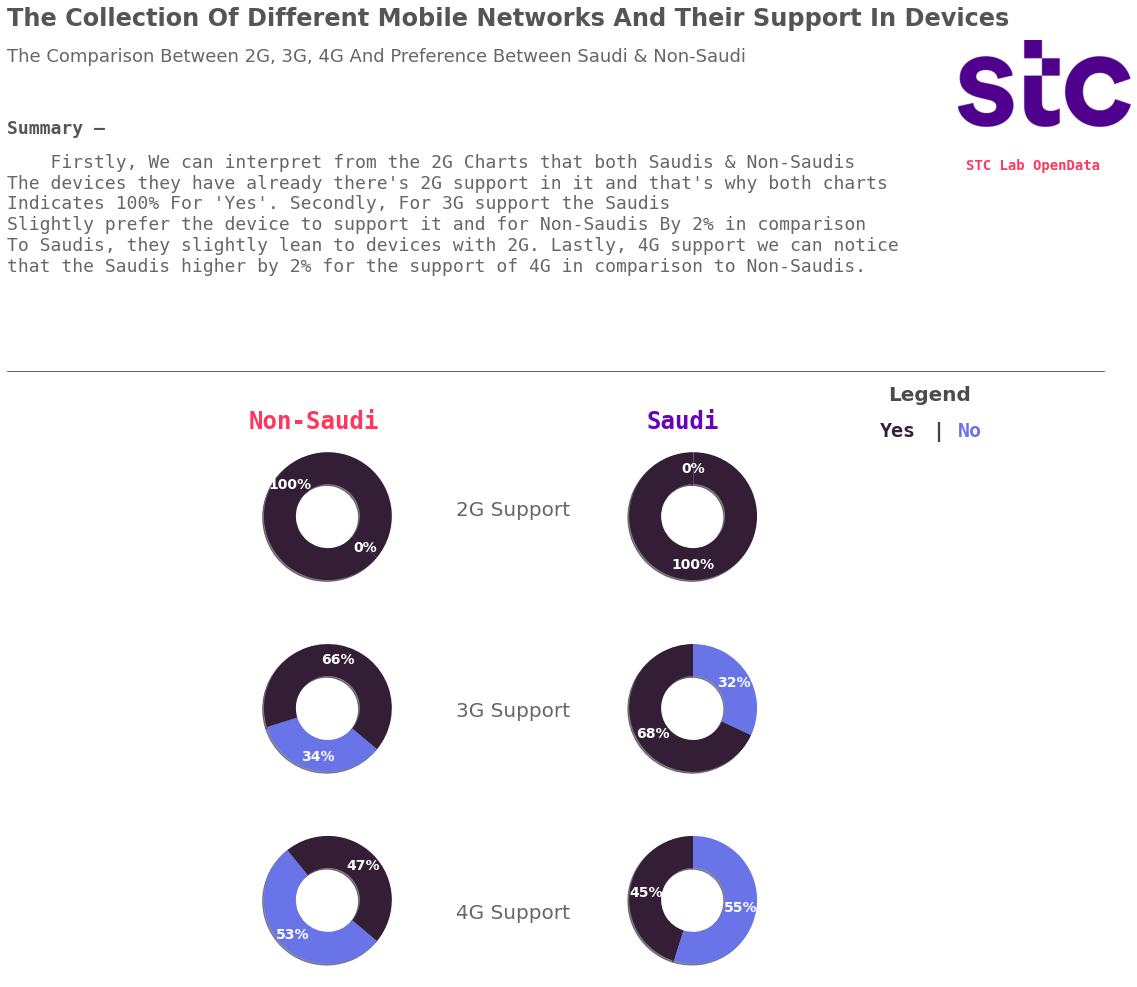

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), subplot_kw=dict(aspect="equal"))

circle = plt.Circle((0, 0), radius=0.44, color="white")

p = plt.gcf()
p.gca().add_artist(circle)

# plt.subplots_adjust(wspace=0.5)

# index of 2g
labels_2g = []
for i in support_2g.index:
    labels_2g.append(i[1])

# index of 3g
labels_3g = []
for i in support_3g.index:
    labels_3g.append(i[1])

# index of 4g
labels_4g = []
for i in support_4g.index:
    labels_4g.append(i[1])

# Create the donut chart For Non-Saudi
ax[0][0].pie(x=support_2g["Non-Saudi"],
    #    labels=labels_2g,
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=320,
       pctdistance=0.77,
)

ax[1][0].pie(x=support_3g["Non-Saudi"],
    #    labels=labels_3g,
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=320,
       pctdistance=0.77,
)

ax[2][0].pie(x=support_4g["Non-Saudi"],
    #    labels=labels_4g,
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=320,
       pctdistance=0.77,
)

# End of Non-Saudi Donut Charts
# ==================================================================

# Create the donut chart For Saudi
ax[0][1].pie(x=support_2g["Saudi"],
    #    labels=labels_2g,
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=90,
       pctdistance=0.75,
)

ax[1][1].pie(x=support_3g["Saudi"],
    #    labels=labels_3g,
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=90,
       pctdistance=0.75,
)

ax[2][1].pie(x=support_4g["Saudi"],
    #    labels=labels_4g,
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=90,
       pctdistance=0.75,
)

# End of Saudi Donut Charts
# ==================================================================



# Create the legend For BOTH Charts (6 Total)
fig.text(x=0.95,
         y=0.93,
         s="Legend",
         fontsize=20,
         fontfamily="sans-serif",
         fontweight="bold",
         color="#333",
         alpha=0.88
)

fig.text(x=0.94,
         y=0.88,
         s="Yes",
         fontsize=20,
         fontfamily="monospace",
         fontweight="bold",
         color="#331E36"
)

fig.text(x=1,
         y=0.88,
         s="|",
         fontsize=20,
         fontfamily="monospace",
         fontweight="bold",
         color="#444"
)

fig.text(x=1.03,
         y=0.88,
         s="No",
         fontsize=20,
         fontfamily="monospace",
         fontweight="bold",
         color="#6874E8"
)

# Create an Xaxis labels for BOTH Charts
fig.text(x=0.45,
         y=0.77,
         s="2G Support",
         fontsize=20,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

fig.text(x=0.45,
         y=0.49,
         s="3G Support",
         fontsize=20,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

fig.text(x=0.45,
         y=0.21,
         s="4G Support",
         fontsize=20,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

# ============================= Set Title, Suptitle, legend title, Summary, Logo, Source =============================

# Set legend title #FF375D 
# Non Saudi
fig.text(x=0.21,
         y=0.89,
         s="Non-Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="monospace",
         color="#FF375D"
)

# Set legend title # 6A01BB 
# Saudi
fig.text(x=0.67,
         y=0.89,
         s="Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="monospace",
         color="#6A01BB"
)

# Set title
fig.text(x=-0.07,
         y=1.45,
         s="The Collection Of Different Mobile Networks And Their Support In Devices",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#555"
)

# Set Suptitle
fig.text(x=-0.07,
         y=1.4,
         s="The Comparison Between 2G, 3G, 4G And Preference Between Saudi & Non-Saudi",
         fontsize=18,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

# Set Summary Header
fig.text(x=-0.07,
         y=1.3,
         s="Summary —",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#555"
)

# Set Summary Text
fig.text(x=-0.07,
         y=1.08,
         s="""
    Firstly, We can interpret from the 2G Charts that both Saudis & Non-Saudis
The devices they have already there's 2G support in it and that's why both charts
Indicates 100% For 'Yes'. Secondly, For 3G support the Saudis 
Slightly prefer the device to support it and for Non-Saudis By 2% in comparison
To Saudis, they slightly lean to devices with 2G. Lastly, 4G support we can notice
that the Saudis higher by 2% for the support of 4G in comparison to Non-Saudis.
         """,
         fontsize=18,
         fontweight="light",
         fontfamily="monospace",
         color="#666"
)

# Set logo
stc_logo = Image.imread(STC_LOGO_PATH)
newax_logo = fig.add_axes([1.03, 1.23, 0.20, 0.20], anchor="NE", zorder=1337)
newax_logo.imshow(stc_logo)
newax_logo.axis(False)

# Set Source
fig.text(x=1.04,
         y=1.25,
         s="STC Lab OpenData",
         fontweight="bold",
         fontsize=14,
         fontfamily="monospace",
         color="#FF375D"
)

# Set line between sections
l2 = lines.Line2D(xdata=[-0.07, 1.2], ydata=[0.97, 0.97], transform=fig.transFigure, figure=fig, color="black", lw=0.6)
fig.lines.extend([l2])


plt.savefig("stc_pie_comparison_mobile_networks", bbox_inches = 'tight')
plt.show()

### The Comparison between bluetooth, touchscreen, Dual SIM.

In [ ]:
# collection wifi support devices
support_wifi = (
    df
    .groupby(["SAUDI_NON_SAUDI", "WIFI_FLAG"])
    .agg({"WIFI_FLAG": "count"})
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)
# collection bluetooth support devices
support_bt = (
    df
    .groupby(["SAUDI_NON_SAUDI", "BLUETOOTH_FLAG"])
    .agg({"BLUETOOTH_FLAG": "count"})
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)

# collection touch screen support devices
support_ts = (
    df
    .groupby(["SAUDI_NON_SAUDI", "TOUCH_SCREEN_FLAG"])
    .agg({"TOUCH_SCREEN_FLAG": "count"})
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)

# collection dual SIM support devices
support_ds = (
    df
    .groupby(["SAUDI_NON_SAUDI", "DUAL_SIM_FLAG"])
    .agg({"DUAL_SIM_FLAG": "count"})
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)
support_ds

SAUDI_NON_SAUDI              Non-Saudi      Saudi
              DUAL_SIM_FLAG                      
DUAL_SIM_FLAG Y              74.479707  72.808833
              N              25.520293  27.191167

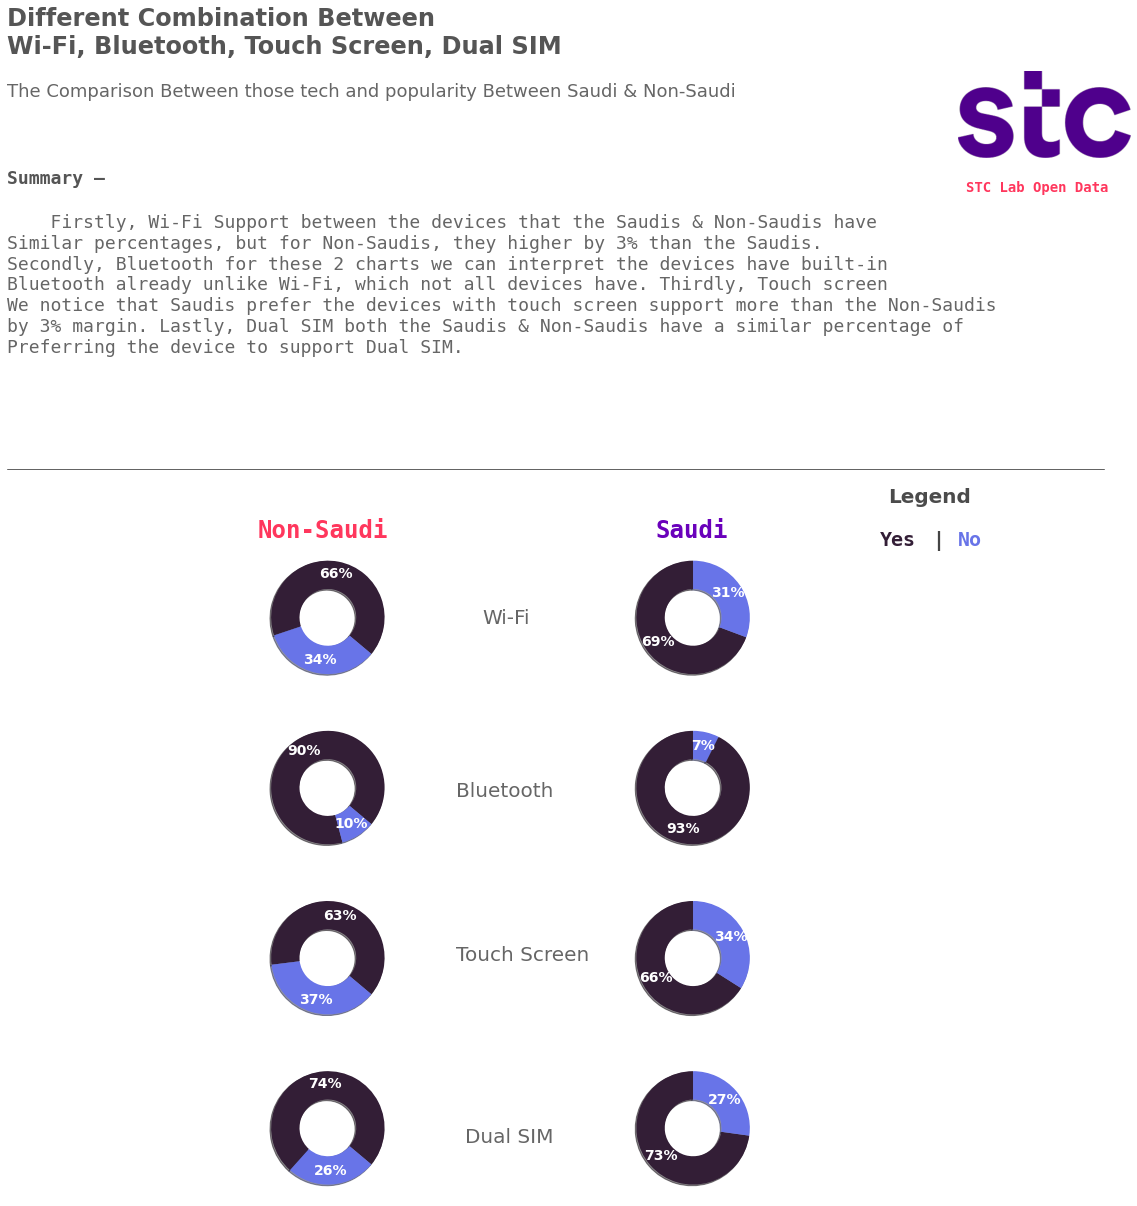

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

circle = plt.Circle((0, 0), radius=0.44, color="white")

p = plt.gcf()
p.gca().add_artist(circle)

# plt.subplots_adjust(wspace=0.5)

# index of wifi
labels_wifi = []
for i in support_wifi.index:
    labels_wifi.append(i[1])

# index of bluetooth
labels_bt = []
for i in support_bt.index:
    labels_bt.append(i[1])

# index of touch screen
labels_ts = []
for i in support_ts.index:
    labels_ts.append(i[1])

# index of dual SIM
labels_ds = []
for i in support_ds.index:
    labels_ds.append(i[1])

# Create the donut chart For Non-Saudi
ax[0][0].pie(x=support_wifi["Non-Saudi"],
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=320,
       pctdistance=0.77,
)

ax[1][0].pie(x=support_bt["Non-Saudi"],
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=320,
       pctdistance=0.77,
)

ax[2][0].pie(x=support_ts["Non-Saudi"],
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=320,
       pctdistance=0.77,
)

ax[3][0].pie(x=support_ds["Non-Saudi"],
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=320,
       pctdistance=0.77,
)

# End of Non-Saudi Donut Charts
# ==================================================================

# Create the donut chart For Saudi
ax[0][1].pie(x=support_wifi["Saudi"],
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=90,
       pctdistance=0.75,
)

ax[1][1].pie(x=support_bt["Saudi"],
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=90,
       pctdistance=0.75,
)

ax[2][1].pie(x=support_ts["Saudi"],
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=90,
       pctdistance=0.75,
)

ax[3][1].pie(x=support_ds["Saudi"],
       autopct="%.0f%%",
       colors=["#331E36", "#6874E8"],
       shadow=True,
       textprops={"size":14, "color":"white", "weight":"bold"},
       wedgeprops=dict(width=0.5),
       startangle=90,
       pctdistance=0.75,
)

# End of Saudi Donut Charts
# ==================================================================



# Create the legend For BOTH Charts (6 Total)
fig.text(x=0.95,
         y=0.93,
         s="Legend",
         fontsize=20,
         fontfamily="sans-serif",
         fontweight="bold",
         color="#333",
         alpha=0.88
)

fig.text(x=0.94,
         y=0.88,
         s="Yes",
         fontsize=20,
         fontfamily="monospace",
         fontweight="bold",
         color="#331E36"
)

fig.text(x=1,
         y=0.88,
         s="|",
         fontsize=20,
         fontfamily="monospace",
         fontweight="bold",
         color="#444"
)

fig.text(x=1.03,
         y=0.88,
         s="No",
         fontsize=20,
         fontfamily="monospace",
         fontweight="bold",
         color="#6874E8"
)

# Create an Xaxis labels for BOTH Charts
fig.text(x=0.48,
         y=0.79,
         s="Wi-Fi",
         fontsize=20,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

fig.text(x=0.45,
         y=0.59,
         s="Bluetooth",
         fontsize=20,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

fig.text(x=0.45,
         y=0.40,
         s="Touch Screen",
         fontsize=20,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

fig.text(x=0.46,
         y=0.19,
         s="Dual SIM",
         fontsize=20,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

# ============================= Set Title, Suptitle, legend title, Summary, Logo, Source =============================

# Set legend title #FF375D 
# Non Saudi
fig.text(x=0.22,
         y=0.89,
         s="Non-Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="monospace",
         color="#FF375D"
)

# Set legend title # 6A01BB 
# Saudi
fig.text(x=0.68,
         y=0.89,
         s="Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="monospace",
         color="#6A01BB"
)

# Set title
fig.text(x=-0.07,
         y=1.45,
         s="""Different Combination Between
Wi-Fi, Bluetooth, Touch Screen, Dual SIM""",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#555"
)

# Set Suptitle
fig.text(x=-0.07,
         y=1.4,
         s="The Comparison Between those tech and popularity Between Saudi & Non-Saudi",
         fontsize=18,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

# Set Summary Header
fig.text(x=-0.07,
         y=1.3,
         s="Summary —",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#555"
)

# Set Summary Text
fig.text(x=-0.07,
         y=1.08,
         s="""
    Firstly, Wi-Fi Support between the devices that the Saudis & Non-Saudis have
Similar percentages, but for Non-Saudis, they higher by 3% than the Saudis.
Secondly, Bluetooth for these 2 charts we can interpret the devices have built-in
Bluetooth already unlike Wi-Fi, which not all devices have. Thirdly, Touch screen
We notice that Saudis prefer the devices with touch screen support more than the Non-Saudis
by 3% margin. Lastly, Dual SIM both the Saudis & Non-Saudis have a similar percentage of 
Preferring the device to support Dual SIM.
         """,
         fontsize=18,
         fontweight="light",
         fontfamily="monospace",
         color="#666"
)

# Set logo
stc_logo = Image.imread(STC_LOGO_PATH)
newax_logo = fig.add_axes([1.03, 1.23, 0.20, 0.20], anchor="NE", zorder=1337)
newax_logo.imshow(stc_logo)
newax_logo.axis(False)

# Set Source
fig.text(x=1.04,
         y=1.29,
         s="STC Lab Open Data",
         fontweight="bold",
         fontsize=14,
         fontfamily="monospace",
         color="#FF375D"
)

# Set line between sections
l2 = lines.Line2D(xdata=[-0.07, 1.2], ydata=[0.97, 0.97], transform=fig.transFigure, figure=fig, color="black", lw=0.6)
fig.lines.extend([l2])


plt.savefig("stc_pie_comparison_auxfeatures", bbox_inches = 'tight')
plt.show()

## OS Preference between Saudi & Non-Saudi

In [ ]:
# Create A collection of OS pref.
os_pref_saudi_nonsaudi = (
    df
    .groupby(["SAUDI_NON_SAUDI", "OS_NAME"])
    .agg({"OS_NAME": "count"})
    .unstack()
    .T
    .sort_values(by=["Non-Saudi"], ascending=False)
)
os_pref_saudi_nonsaudi

SAUDI_NON_SAUDI         Non-Saudi   Saudi
        OS_NAME                          
OS_NAME Android           1433046  154928
        Proprietary        822527   81439
        Symbian             85763   11021
        Other               64058    4024
        RIM OS              26318    3830
        Windows Phone       22369    3215
        BlackBerry OS       13162    1822
        Windows Mobile        260      96

In [ ]:
sizes = [500, 200, 165, 150, 140, 130, 120, 100]

In [ ]:
os_labels = []
for i in os_pref_saudi_nonsaudi.index:
    os_labels.append(i[1])
os_labels

['Android',
 'Proprietary',
 'Symbian',
 'Other',
 'RIM OS',
 'Windows Phone',
 'BlackBerry OS',
 'Windows Mobile']

In [ ]:
# color pallete
colors_pal = ["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#fb5607", "#003049", "#efd3d7"]

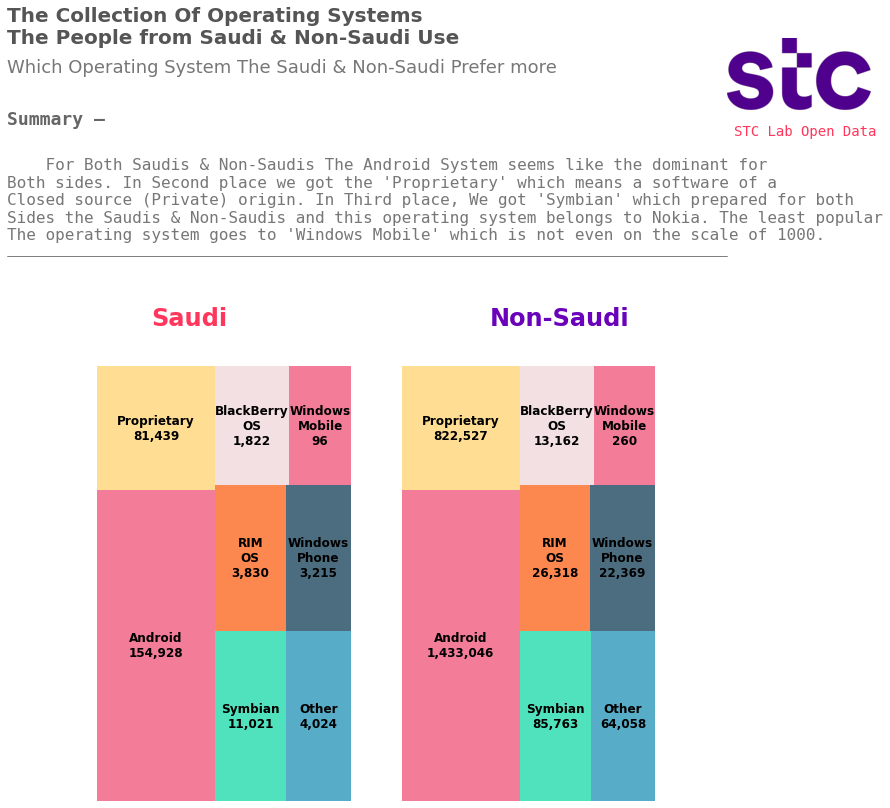

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Create the labels
saudi_labels = []
nonsaudi_labels = []
for i, reg in enumerate(os_labels):
    # For Saudi
    if len(reg.split()) > 0:
        state_holder = "\n".join(reg.split()) + "\n"
    else:
        state_holder = f"{reg}\n "
    saudi_labels.append(state_holder + str(f'{os_pref_saudi_nonsaudi["Saudi"][i]:,}'))

    # For Non-Saudi
    nonsaudi_labels.append(state_holder + str(f'{os_pref_saudi_nonsaudi["Non-Saudi"][i]:,}'))

# Plot for Saudi
squarify.plot(sizes=sizes, text_kwargs={"fontsize":12, "fontweight":"bold"},
              color=colors_pal,
              label=saudi_labels, alpha=0.7, ax=ax[0])

# Plot For Non-Saudi
squarify.plot(sizes=sizes, text_kwargs={"fontsize":12, "fontweight":"bold"},
              color=colors_pal, 
              label=nonsaudi_labels, alpha=0.7, ax=ax[1])

# Removing the axis values
ax[0].axis('off')
ax[1].axis('off')

# Label for Saudi
fig.text(x=0.20,
         y=0.95,
         s="Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#FF375D"
)

# Label for Non-Saudi
fig.text(x=0.67,
         y=0.95,
         s="Non-Saudi",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#6A01BB"
)

# ====================== Title, Suptitle, Summary, Logo, Source ========================

# Set Title
fig.text(x=0,
         y=1.44,
         s="""The Collection Of Operating Systems 
The People from Saudi & Non-Saudi Use""",
         fontsize=20,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#555"
)

# Set Suptitle
fig.text(x=0,
         y=1.39,
         s="Which Operating System The Saudi & Non-Saudi Prefer more",
         fontsize=18,
         fontweight="light",
         fontfamily="sans-serif",
         color="#777"
)

# Set Summary header
fig.text(x=0,
         y=1.3,
         s="Summary —",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#666"
)

# Set Summary text
fig.text(x=0,
         y=1.07,
         s="""
    For Both Saudis & Non-Saudis The Android System seems like the dominant for
Both sides. In Second place we got the 'Proprietary' which means a software of a 
Closed source (Private) origin. In Third place, We got 'Symbian' which prepared for both
Sides the Saudis & Non-Saudis and this operating system belongs to Nokia. The least popular
The operating system goes to 'Windows Mobile' which is not even on the scale of 1000.
         """,
         fontsize=16,
         fontweight="light",
         fontfamily="monospace",
         color="#777"
)

# Set logo
stc_logo = Image.imread(STC_LOGO_PATH)
newax_logo = fig.add_axes([1, 1.25, 0.2, 0.2], anchor="NE", zorder=1337)
newax_logo.imshow(stc_logo)
newax_logo.axis(False)

# Set source
fig.text(x=1.01,
         y=1.28,
         s="STC Lab Open Data",
         fontsize=14,
         fontweight="light",
         fontfamily="monospace",
         color="#FF375D"
)

# Set line
l2 = lines.Line2D(xdata=[0, 1], ydata=[1.07, 1.07], transform=fig.transFigure, figure=fig, color="black", lw=0.5)
fig.lines.extend([l2])


plt.savefig("stc_treemap_os_preference", bbox_inches = 'tight')
plt.show()

## Most Popular Device Holders Filtered By Nationalities

In [ ]:
popular_na = (
    df
    .groupby(["NATIONALITY_NAME"])
    .agg({"DEVICE_COUNT": "count"})
    .unstack()
    .T
    .sort_values(ascending=False)
    .nlargest(10)
)
popular_na

              NATIONALITY_NAME
DEVICE_COUNT  Unknown             245371
              India               165296
              Saudi Arabia        149338
              Philippines         141576
              Yemen               141301
              Egypt               139541
              Pakistan            138343
              Bangladesh          135472
              Sudan               120778
              Indonesia           101931
dtype: int64

In [ ]:
# Get the labels of the dataframe
na_labels = []
for i in popular_na.index:
    na_labels.append(i[1])

# Create a Grident bars
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect='auto', zorder=1)
    ax.axis(lim)

# Add labels to bars
def add_value_labels(ax, spacing=5):
    # For each bar: place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label; change to your liking
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = '{:,.0f}'.format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords='offset points', # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values


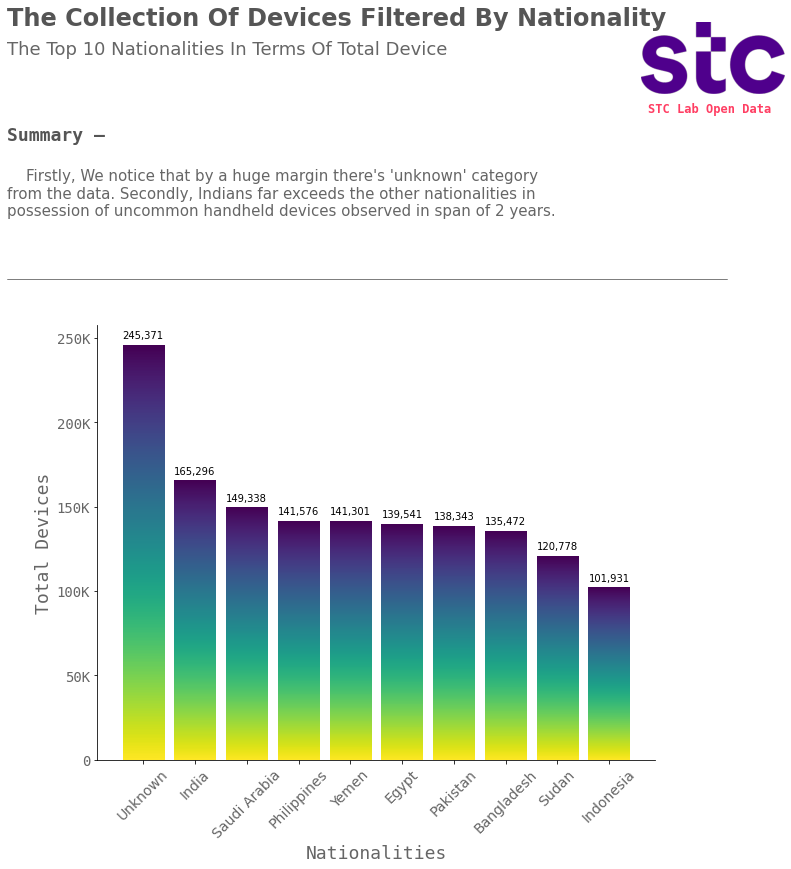

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
mpl.pyplot.viridis()

bar = ax.bar(x=na_labels,
             height=popular_na["DEVICE_COUNT"])
plt.xticks(rotation=45)
# ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Set y label and x label
ax.set_ylabel("Total Devices", 
              fontsize=18, 
              fontfamily="monospace", 
              fontweight="light", 
              color="#666"
)

ax.set_xlabel("Nationalities", 
              fontsize=18, 
              fontfamily="monospace", 
              fontweight="light", 
              color="#666"
)



# Create X ticks
ax.set_xticklabels(labels=na_labels, fontsize=14, color="#666")

# Create y ticks
ax.set_yticklabels(labels=["0", "50K", "100K", "150K", "200K", "250K", "300K"],
                   fontsize=14,
                   fontfamily="monospace",
                   fontweight="light",
                   color="#666")

# Create the gradient
gradientbars(bar)

# Add values
add_value_labels(ax)

# Remove borders top, right
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


# Set Title, Summary, Logo, lines
fig.text(x=0,
         y=1.4,
         s="The Collection Of Devices Filtered By Nationality",
         fontsize=24,
         fontweight="bold",
         fontfamily="sans-serif",
         color="#555"
)
fig.text(x=0,
         y=1.35,
         s="The Top 10 Nationalities In Terms Of Total Device",
         fontsize=18,
         fontweight="light",
         fontfamily="sans-serif",
         color="#666"
)

fig.text(x=0,
         y=1.2,
         s="Summary —",
         fontsize=18,
         fontweight="bold",
         fontfamily="monospace",
         color="#555"
)

fig.text(x=0,
         y=1.04,
         s="""
    Firstly, We notice that by a huge margin there's 'unknown' category
from the data. Secondly, Indians far exceeds the other nationalities in
possession of uncommon handheld devices observed in span of 2 years.
         """,
         fontsize=15,
         fontweight="light",
         fontfamily="Sans-Serif",
         color="#666666"
)

fig.text(x=0.89,
         y=1.25,
         s="STC Lab Open Data",
         fontsize=12,
         fontweight="bold",
         fontfamily="monospace",
         color="#FF375D",
         alpha=0.96)

logo = Image.imread(STC_LOGO_PATH)
newax = fig.add_axes([0.88, 1.25, 0.2, 0.2], anchor=(0.5, 0.4), zorder=1)
newax.imshow(logo)
newax.axis(False)

l1 = lines.Line2D([0, 1], [0.96, 0.96], transform=fig.transFigure, figure=fig, color='black', lw=0.5)
fig.lines.extend([l1])

plt.savefig("stc_top10_nationality_total_devices", bbox_inches = 'tight')
plt.show()

# Time Series Forecasting 

We'll Try to prepare the N-Beats replication from the famous paper N-Beats! https://arxiv.org/pdf/1905.10437.pdf

And try try to forecast the demand on uncommon handheld devices

But First let's test it out on artificial data.

## Prepare the data for forecasting

In [ ]:
df.head(2)

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,2G_FLAG,3G_FLAG,4G_FLAG,WIFI_FLAG,BLUETOOTH_FLAG,TOUCH_SCREEN_FLAG,DUAL_SIM_FLAG,GENDER_TYPE,AGE_RANGE,NATIONALITY_ABBR,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019-01-31,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
1,2020-05-31,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,<18,UNK,Unknown,Non-Saudi,1


In [ ]:
# Create a copy of the original
df_forecast = df.copy()


df_forecast = (
    df_forecast
    # .groupby(["CAL_DT", "DEVICE_COUNT"], as_index=False)
    # .agg({"DEVICE_COUNT": "count"})
    # .unstack()
    .loc[:, ["CAL_DT", "DEVICE_COUNT"]]
    .set_index("CAL_DT")
    .sort_index()
    .rename(columns={"DEVICE_COUNT": "Devices"})
    .resample("M")
    .sum()
)
df_forecast.head()

,Devices
CAL_DT,
2018-11-30,3708246
2018-12-31,3852657
2019-01-31,3900205
2019-02-28,3961096
2019-03-31,3975604


In [ ]:
# Setting hyperparameters & Variables such as: Window, Horizon
WINDOW_SIZE = 7
HORIZON = 1
EPOCHS = 5000
BATCH_SIZE = 1024
NUM_NEURONS = 512
NUM_LAYERS = 4
NUM_STACKS = 30

# LOOKBACK
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON
INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
# Create the windowed dataset
for i in range(WINDOW_SIZE):
    df_forecast[f"Devices+{i+1}"] = df_forecast["Devices"].shift(periods=i+1)

df_forecast.head()

,Devices,Devices+1,Devices+2,Devices+3,Devices+4,Devices+5,Devices+6,Devices+7
CAL_DT,,,,,,,,
2018-11-30,3708246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,3852657,3708246.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,3900205,3852657.0,3708246.0,NaN,NaN,NaN,NaN,NaN
2019-02-28,3961096,3900205.0,3852657.0,3708246.0,NaN,NaN,NaN,NaN
2019-03-31,3975604,3961096.0,3900205.0,3852657.0,3708246.0,NaN,NaN,NaN


In [ ]:
# Create X, y split for tf to process into Train, test
X = df_forecast.dropna().drop("Devices", axis=1).astype(np.float32)
y = df_forecast.dropna()["Devices"].astype(np.float32)

len(X), len(y)

(17, 17)

In [ ]:
# split into train & test
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(13, 13, 4, 4)

In [ ]:
# Create a tensors from the splitted data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

## Create the N-Beats Class block

In [ ]:
class NbeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
    
        # Build the Block that contains a stack of 4 FC layers that runs on relu activation
        self.hidden = [layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        # Build the Block Theta Layer (output) which outputs ["backcast", "forecast"]
        self.theta_layer = layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # output Backcast & Forecast from "theta"
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

## Build the model

In [ ]:
# set seed
tf.random.set_seed(42)

# 1.Create the block
nbeats_block_layer = NbeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=NUM_NEURONS,
                                 n_layers=NUM_LAYERS,
                                 name="initial_block")

# 2. Create the stack input
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 2. Create the initial Nbeats Block
backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name="subtract_initial")

# 3. Create the Stacks
for i, _ in enumerate(range(NUM_STACKS-1)):
    # 4. Create the Nbeats Block in the stacks
    backcast, block_forecast = NbeatsBlock(input_size=INPUT_SIZE,
                                           theta_size=THETA_SIZE,
                                           horizon=HORIZON,
                                           n_neurons=NUM_NEURONS,
                                           n_layers=NUM_LAYERS,
                                           name=f"nbeats_block_{i}")(residuals)

    # 5. Create the Connection Dual Residuals
    residuals = layers.subtract([residuals, backcast], name=f"Subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"Add_{i}")

model_nbeats = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="NBeatsBlock_model")

model_nbeats.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

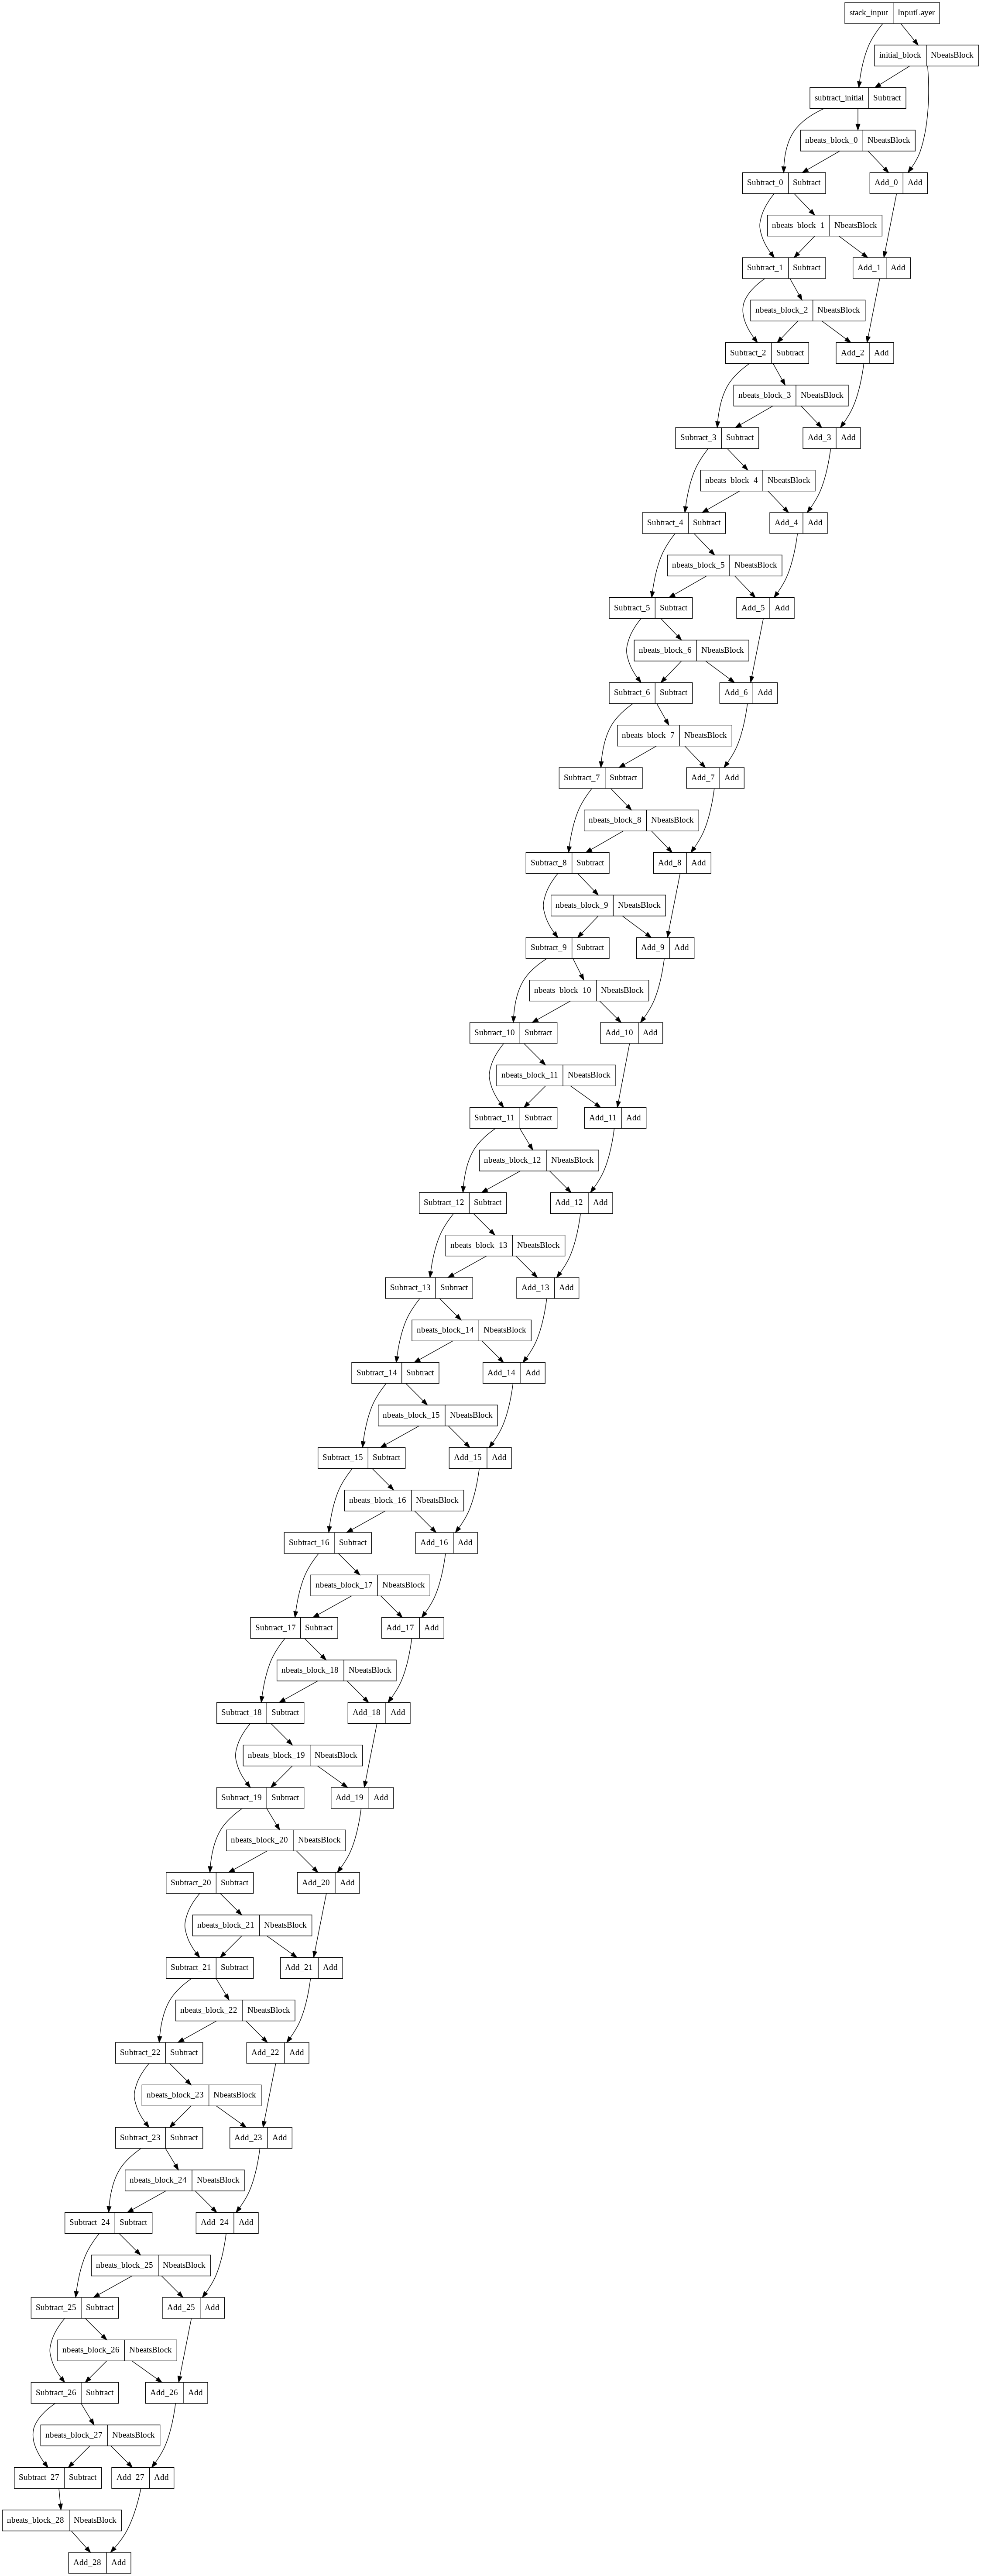

In [ ]:
# Plot the N-BEATS model and inspect the architecture
plot_model(model_nbeats)

In [ ]:
# Fit the model
model_nbeats.fit(train_dataset,
                 epochs=EPOCHS,
                 validation_data=test_dataset,
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
                            tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=8, verbose=1)])

Epoch 1/5000
1/1 [==============================] - 0s 452ms/step - loss: 75917.9219 - mae: 75917.9219 - mse: 7612746752.0000 - val_loss: 147268.4375 - val_mae: 147268.4375 - val_mse: 21730770944.0000 - lr: 0.0010
Epoch 2/5000
1/1 [==============================] - 0s 299ms/step - loss: 73878.0000 - mae: 73878.0000 - mse: 7157023744.0000 - val_loss: 68042.5000 - val_mae: 68042.5000 - val_mse: 4674677760.0000 - lr: 0.0010
Epoch 3/5000
1/1 [==============================] - 0s 428ms/step - loss: 35822.5000 - mae: 35822.5000 - mse: 1964362368.0000 - val_loss: 14389.0000 - val_mae: 14389.0000 - val_mse: 247709152.0000 - lr: 0.0010
Epoch 4/5000
1/1 [==============================] - 0s 211ms/step - loss: 89718.7109 - mae: 89718.7109 - mse: 9425155072.0000 - val_loss: 35154.0000 - val_mae: 35154.0000 - val_mse: 1267161344.0000 - lr: 0.0010
Epoch 5/5000
1/1 [==============================] - 0s 226ms/step - loss: 39594.9805 - mae: 39594.9805 - mse: 2907885824.0000 - val_loss: 161952.8750 - va

In [ ]:
# Evaluation on test data (Artificial)
model_nbeats.evaluate(test_dataset)

1/1 [==============================] - 0s 43ms/step - loss: 4717.1875 - mae: 4717.1875 - mse: 51070756.0000


[4717.1875, 4717.1875, 51070756.0]

## Forecasting into the future using N-beats

In [ ]:
# How many steps do you want to forecast
FUTURE_STEPS = 30 # 30 days

## Prepare the timesteps & forecast 30 days

In [ ]:
# Create A Function to forecast into the future
def make_forecasts(values, model, future_steps=FUTURE_STEPS, window_size=WINDOW_SIZE):
    """
    A Function to Make a forecasting into the future using tensorflow model

    Args
    values: the values you want to forecast (list)
    model: the tensorflow model that trained on time series forecasting (TF model) 

    Returns:
    A List of Forecasted values into the future
    """

    # Create a list to hold the forecasted result
    forecast_result = []
    # Everytime we need to window inside the list so everytime we forecast we take a new window
    last_window = values[-window_size:]

    for _ in range(future_steps):

        # Forecast into the future
        forecasted_res = model.predict(tf.expand_dims(last_window, axis=0))
        
        # Print for logs and interpret the result for users
        print(f"Forecasting On values: \n {last_window} \nNew Forecasted value: {tf.squeeze(forecasted_res).numpy()}")

        # Save the forecast result
        forecast_result.append(tf.squeeze(forecasted_res).numpy())

        # Update the old window
        last_window = np.append(last_window, forecast_result)[-window_size:]

    return forecast_result

In [ ]:
# Forecast into the future
future_forecast = make_forecasts(values=y,
                                 model=model_nbeats,
                                 future_steps=FUTURE_STEPS,
                                 window_size=WINDOW_SIZE)
future_forecast

1/1 [==============================] - 0s 42ms/step
Forecasting On values: 
 CAL_DT
2020-04-30    3457235.0
2020-05-31    3385660.0
2020-06-30    3329489.0
2020-07-31    3253498.0
2020-08-31    3188363.0
2020-09-30    3112161.0
2020-10-31    3057121.0
Freq: M, Name: Devices, dtype: float32 
New Forecasted value: 3184186.75
1/1 [==============================] - 0s 54ms/step
Forecasting On values: 
 [3385660.  3329489.  3253498.  3188363.  3112161.  3057121.  3184186.8] 
New Forecasted value: 3125201.75
1/1 [==============================] - 0s 33ms/step
Forecasting On values: 
 [3253498.  3188363.  3112161.  3057121.  3184186.8 3184186.8 3125201.8] 
New Forecasted value: 3035512.25
1/1 [==============================] - 0s 32ms/step
Forecasting On values: 
 [3057121.  3184186.8 3184186.8 3125201.8 3184186.8 3125201.8 3035512.2] 
New Forecasted value: 2982565.5
1/1 [==============================] - 0s 31ms/step
Forecasting On values: 
 [3184186.8 3125201.8 3035512.2 3184186.8 3125201.8

[3184186.8,
 3125201.8,
 3035512.2,
 2982565.5,
 3003600.0,
 2904561.0,
 2917925.2,
 2945195.8,
 2896460.8,
 2843240.0,
 2826732.2,
 2812277.2,
 2767659.8,
 2761796.8,
 2749870.0,
 2712988.0,
 2682558.0,
 2666629.8,
 2644561.8,
 2616555.0,
 2600872.8,
 2580045.0,
 2552468.8,
 2530000.2,
 2511458.8,
 2489152.8,
 2466648.5,
 2447752.0,
 2426440.0,
 2403867.5]

## Plot the forecast values from nbeats model

In [ ]:
# Create the start date & end date to plot the forecasts
start_date = df_forecast.index[-1] + pd.Timedelta(days=1)
end_date = df_forecast.index[-1] + pd.Timedelta(days=FUTURE_STEPS) 
timesteps = np.arange(start_date, end_date, dtype="datetime64[D]") # The Next 30 days 
timesteps

array(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
       '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
       '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
       '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
       '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
       '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
       '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
       '2020-11-29'], dtype='datetime64[D]')

In [ ]:
# Fix the values by 1 tick so it doesn't mess up the plot graph
timesteps = np.insert(timesteps, 0, df_forecast.index[-1])
future_forecast = np.insert(future_forecast, 0, df_forecast["Devices"][-1])
timesteps, future_forecast

(array(['2020-10-31', '2020-10-31', '2020-10-31', '2020-11-01',
        '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
        '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
        '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
        '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
        '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21',
        '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
        '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29'],
       dtype='datetime64[D]'),
 array([3057121. , 3057121. , 3184186.8, 3125201.8, 3035512.2, 2982565.5,
        3003600. , 2904561. , 2917925.2, 2945195.8, 2896460.8, 2843240. ,
        2826732.2, 2812277.2, 2767659.8, 2761796.8, 2749870. , 2712988. ,
        2682558. , 2666629.8, 2644561.8, 2616555. , 2600872.8, 2580045. ,
        2552468.8, 2530000.2, 2511458.8, 2489152.8, 2466648.5, 2447752. ,
        2426440. , 2403867.5], dtype=float32))

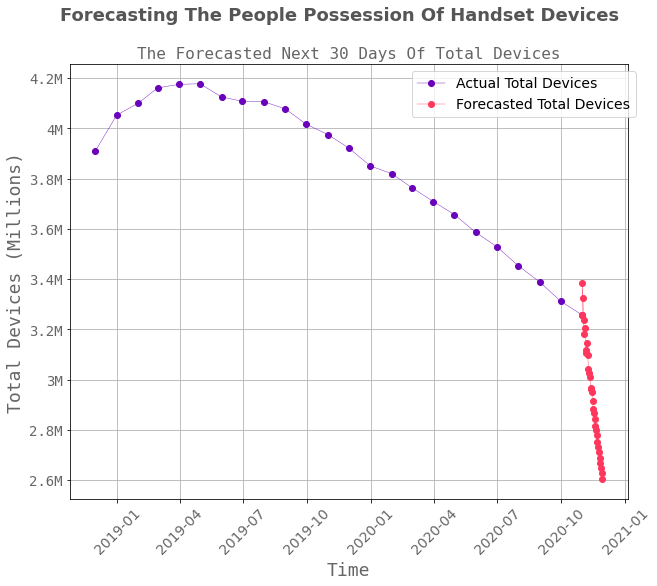

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df_forecast.index, 
        df_forecast["Devices"] / 1_000_000,
        label="Actual Total Devices", 
        color="#6A01BB", 
        marker="o", 
        lw=0.4
)

ax.plot(timesteps, 
        future_forecast / 1_000_000,
        label="Forecasted Total Devices", 
        color="#FF375D", 
        marker="o", 
        lw=0.4
)

plt.grid(True)

fig.suptitle("Forecasting The People Possession Of Handset Devices",
             fontsize=18,
             fontfamily="sans-serif",
             fontweight="bold",
             color="#555"
)
ax.set_title("The Forecasted Next 30 Days Of Total Devices",
             fontsize=16,
             fontfamily="monospace",
             fontweight="light",
             color="#666"
)

ax.set_ylabel("Total Devices (Millions)",
              fontsize=18,
              fontfamily="monospace",
              fontweight="light",
              color="#666"
)

ax.set_yticklabels(labels=["2.4M", "2.6M", "2.8M", "3M", "3.2M", "3.4M", "3.6M", "3.8M", "4M", "4.2M"],
                   fontsize=14,
                   fontfamily="monospace",
                   fontweight="light",
                   color="#666"
)

ax.set_xlabel("Time", 
            fontsize=18,
            fontfamily="monospace",
            fontweight="light",
            color="#666"
)


plt.xticks(rotation=45, fontsize=14, color="#666")

ax.legend(bbox_to_anchor=(0.6, 1), fontsize=14)

plt.savefig("stc_forecasted_total_devices", bbox_inches = 'tight')
plt.show()

In [ ]:
# Compress the pictures from plots
!zip -r "/content/assets.zip" "/content/assets"

updating: content/assets/ (stored 0%)
  adding: content/assets/model.png (deflated 18%)
  adding: content/assets/stc_age_range_saudi_nonsaudi.png (deflated 11%)
  adding: content/assets/stc_forecasted_total_devices.png (deflated 8%)
  adding: content/assets/stc_top15_brands_devices.png (deflated 12%)
  adding: content/assets/stc_pie_comparison_mobile_networks.png (deflated 8%)
  adding: content/assets/stc_top10_nationality_total_devices.png (deflated 10%)
  adding: content/assets/stc_pie_comparison_auxfeatures.png (deflated 8%)
  adding: content/assets/stc_pie_device_preference.png (deflated 7%)
  adding: content/assets/stc_treemap_os_preference.png (deflated 9%)
  adding: content/assets/stc_linechart_devicetotal.png (deflated 10%)
